In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Data

In [2]:
metro_df = pd.read_csv('data/metro_coordinates_new.csv',encoding='cp1252')
metro_df.sample(20)

stop line               type       lat        lon
85                 Las Torres    H              Cable  6.236893 -75.536266
10                Andalucâ€™a    K              Cable  6.296364 -75.551852
21                   Fâ€¡tima   L1  Bus rapid transit  6.231670 -75.586582
83                   Hospital   L2  Bus rapid transit  6.264209 -75.563068
13                    Ayurâ€¡    A              Metro  6.186567 -75.585445
50                    Acevedo    A              Metro  6.299898 -75.558592
16               Suramericana    B              Metro  6.252996 -75.582942
70                Plaza Mayor   L1  Bus rapid transit  6.244537 -75.575327
52                     Caribe    A              Metro  6.278256 -75.569475
6                Palos verdes   L2  Bus rapid transit  6.262568 -75.555802
53                    Acevedo    K              Cable  6.300357 -75.558284
29               Industriales   L1  Bus rapid transit  6.230524 -75.576496
59                   Hospital    A              Metro  6.263647 -75.563070
66                   Cisneros    B              Metro  6.249121 -75.574827
42                 San Javier    J              Cable  6.256671 -75.613447
78             Barrio Colâ€”n   L2  Bus rapid transit  6.240684 -75.569953
30  Universidad de Medellâ€™n   L1  Bus rapid transit  6.230888 -75.609294
67                San Antonio  T-A            Tramway  6.247146 -75.569289
8              Las Esmeraldas   L2  Bus rapid transit  6.278548 -75.553203
23                   Fâ€¡tima   L2  Bus rapid transit  6.231670 -75.586582

In [3]:
communa_df = pd.read_csv('data/comunas.csv')
communa_df

comuna name  comuna_index  \
0        Itagui-Comuna 06                        '              1   
1         Itagui-Comuna 05                        '             2   
2        Urbana La Estrella                      '              3   
3         Bello-Comuna 06                         '             4   
4         Bello-Comuna 05                         '             5   
..                                              ...           ...   
61      Rural Girardota                          '             62   
62        Urbana Girardota                        '            63   
63       Corregimiento Santa Elena               '             64   
64        Popular                                 '            65   
65        Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
61    'Girardota'           7         -75.44836         6.380775   
62    'Girardota'           7         -75.44330         6.380888   
63     'Medellin'           1         -75.51665         6.234823   
64     'Medellin'           1         -75.54420         6.293636   
65       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  
0                      1  
1                      2  
2                     25  
3                      6  
4                      5  
..                   ...  
61                    41  
62                    27  
63                    47  
64                    31  
65                     4  

[66 rows x 7 columns]

In [4]:
commutes_df = pd.read_csv('data/comunas_commutes.csv')
commutes_df

Origin  Destination  Relative number of trips
0          1            1                       271
1          2            1                        40
2          3            1                        56
3          4            1                        42
4          7            1                        45
...      ...          ...                       ...
3342      55           66                         2
3343      56           66                         1
3344      59           66                         2
3345      64           66                        10
3346      66           66                        60

[3347 rows x 3 columns]

In [5]:
# Aggregate based on 'origin'
output_df = commutes_df.groupby('Origin')['Relative number of trips'].sum().reset_index()
# Aggregate based on 'destination'
input_df = commutes_df.groupby('Destination')['Relative number of trips'].sum().reset_index()
# Rename
output_df = output_df.rename(columns={'Origin':'comuna_index','Relative number of trips': 'origin_trips'})
input_df = input_df.rename(columns={'Destination':'comuna_index','Relative number of trips': 'destination_trips'})


In [6]:
communa_gdf = gpd.read_file('data/comunas_boundaries/MACROZONAS.shp')


In [7]:
communa_gdf.sample(5)

MUNICIPIO  MACROZONA                                           geometry
16        Bello       38.0  POLYGON ((-75.57327 6.31382, -75.57302 6.31336...
2   La Estrella       25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
51     Medellin       30.0  POLYGON ((-75.55631 6.31144, -75.55670 6.31100...
23     Medellin       45.0  POLYGON ((-75.65358 6.33367, -75.65356 6.33367...
27     Envigado       51.0  POLYGON ((-75.59236 6.17366, -75.59240 6.17361...

<Axes: >

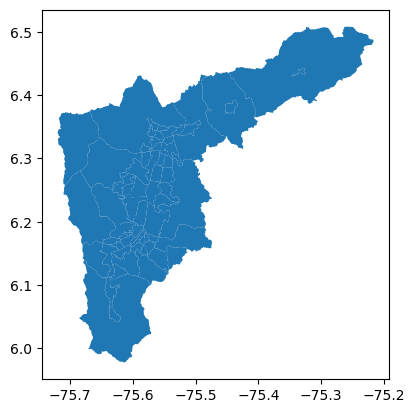

In [8]:
communa_gdf.columns=['municipality','comuna_index','geometry']
communa_gdf.plot()

In [9]:
communa_gdf.shape

(66, 3)

In [10]:
gmaps_df = pd.read_csv('data/comunas_gmaps.csv')
gmaps_df

travel_time_m     mode  origin  destination
0           0.000000  driving       1            1
1           7.150000  driving       1            2
2          17.933333  driving       1            3
3          46.266667  driving       1            4
4          43.550000  driving       1            5
...              ...      ...     ...          ...
13063     453.366667  walking      66           62
13064     459.766667  walking      66           63
13065     283.316667  walking      66           64
13066     261.116667  walking      66           65
13067       0.000000  walking      66           66

[13068 rows x 4 columns]

In [11]:
gmaps_df['mode'].value_counts()

mode
driving    4356
transit    4356
walking    4356
Name: count, dtype: int64

count        66.000000
mean      47964.196970
std       58885.779545
min        1351.000000
25%       13566.750000
50%       23714.000000
75%       65084.000000
max      323176.000000
Name: population, dtype: float64


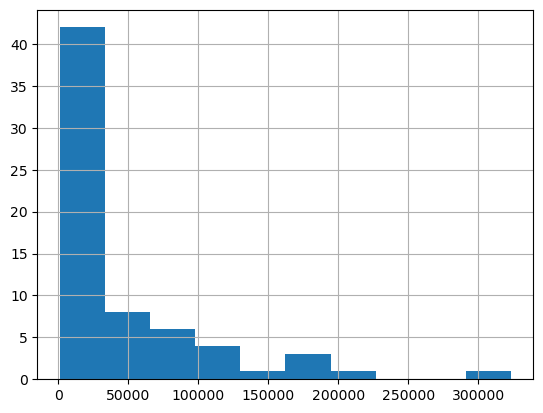

In [12]:
pop_df = pd.read_csv('data/comunas_pop.csv')
#plot the histogram of the population based onthe 'poulation'   column
pop_df['population'].hist()
pop_df
print(pop_df['population'].describe())

In [13]:
firms_df = pd.read_csv('data/comunas_firms.csv')
firms_df

comuna_index  muni_index  num_firms
0              1           8        494
1              2           8        949
2              3           9       1946
3              4           3        733
4              5           3       1459
..           ...         ...        ...
61            62           7        151
62            63           7        992
63            64           1         37
64            65           1        685
65            66           8       1661

[66 rows x 3 columns]

In [14]:
stratum_df = pd.read_csv('data/comunas_stratum.csv')
stratum_df

comuna_index  muni_index   stratum
0              1           8  1.901746
1              2           8  2.040128
2              3           9  2.467947
3              4           3  1.955026
4              5           3  2.206717
..           ...         ...       ...
61            62           7  2.183294
62            63           7  2.146245
63            64           1  1.986825
64            65           1  1.510299
65            66           8  2.503224

[66 rows x 3 columns]

# Analysis

In [15]:
#merged_df = pd.merge(communa_gdf[['macrozona','geometry']],communa_df, on = 'macrozona')
merged_df = pd.merge(communa_gdf[['comuna_index','geometry']],pop_df[['comuna_index','population']], on = 'comuna_index')
merged_df = pd.merge(merged_df,firms_df[['comuna_index','num_firms']], on = 'comuna_index')
final_df = pd.merge(merged_df,stratum_df[['comuna_index','stratum']], on = 'comuna_index')
final_df

comuna_index                                           geometry  \
0            1.0  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...   
1            2.0  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...   
2           25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...   
3            6.0  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...   
4            5.0  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...   
..           ...                                                ...   
61          41.0  POLYGON ((-75.44804 6.43546, -75.44801 6.43539...   
62          27.0  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...   
63          47.0  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...   
64          31.0  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...   
65           4.0  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...   

    population  num_firms   stratum  
0        13458        494  1.901746  
1        12853        949  2.040128  
2       175765         73  2.127838  
3        17486        378  1.793694  
4        22363       1459  2.206717  
..         ...        ...       ...  
61       16071       3728  3.022330  
62       85149        152  2.339601  
63      167209       6272  5.325056  
64       11172        821  2.624020  
65       19296        733  1.955026  

[66 rows x 5 columns]

In [16]:
final_df['stratum'].describe()

count    66.000000
mean      2.545173
std       0.881194
min       1.000000
25%       1.955304
50%       2.429605
75%       3.022330
max       5.325056
Name: stratum, dtype: float64

In [17]:
# Get each comuna's area as a new column
final_df['area'] = final_df['geometry'].area

# Merge with input_df and output_df
final_df = final_df.merge(input_df, on='comuna_index', how='left')
final_df = final_df.merge(output_df, on='comuna_index', how='left')

# Calculate total flow
final_df['total_flow'] = final_df[['origin_trips', 'destination_trips']].sum(axis=1)

# Calculate the density of population and firms as new columns
final_df['pop_density'] = final_df['population'] / final_df['area']
final_df['firms_density'] = final_df['num_firms'] / final_df['area']

# Calculate the number of demand, firms points and poor demand points
final_df['Num_demand_points'] = (18 * final_df['total_flow'] / 10000 + 2).astype(int)
final_df['Num_firms_points'] = (final_df['num_firms'] / 1000 + 1).astype(int)
final_df['Poor_demand_level'] = (6 - final_df['stratum']).astype(int)


# Display the dataframe
final_df.head(5)

C:\Users\SBH\AppData\Local\Temp\ipykernel_2836\1942879562.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  final_df['area'] = final_df['geometry'].area


comuna_index                                           geometry  \
0           1.0  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...   
1           2.0  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...   
2          25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...   
3           6.0  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...   
4           5.0  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...   

   population  num_firms   stratum      area  destination_trips  origin_trips  \
0       13458        494  1.901746  0.000075               1113          1113   
1       12853        949  2.040128  0.000054                359           358   
2      175765         73  2.127838  0.000646                496           496   
3       17486        378  1.793694  0.000161                490           489   
4       22363       1459  2.206717  0.000139                683           684   

   total_flow   pop_density  firms_density  Num_demand_points  \
0        2226  1.799843e+08   6.606647e+06                  6   
1         717  2.389497e+08   1.764283e+07                  3   
2         992  2.719110e+08   1.129321e+05                  3   
3         979  1.088922e+08   2.353954e+06                  3   
4        1367  1.614643e+08   1.053421e+07                  4   

   Num_firms_points  Poor_demand_level  
0                 1                  4  
1                 1                  3  
2                 1                  3  
3                 1                  4  
4                 2                  3

In [18]:
# show the row where the communa_index = 21
final_df[final_df['comuna_index'] == 61]

comuna_index                                           geometry  \
37          61.0  POLYGON ((-75.48481 6.19017, -75.48454 6.18904...   

    population  num_firms   stratum      area  destination_trips  \
37       75905       3284  1.754728  0.002331                354   

    origin_trips  total_flow   pop_density  firms_density  Num_demand_points  \
37           353         707  3.256591e+07   1.408951e+06                  3   

    Num_firms_points  Poor_demand_level  
37                 4                  4

In [19]:
final_df['total_flow'].describe()

count       66.00000
mean      2637.69697
std       2675.91394
min        461.00000
25%       1077.75000
50%       1862.50000
75%       3429.75000
max      18179.00000
Name: total_flow, dtype: float64

In [20]:
# convert the metro_df to a GeoDataFrame
metro_gdf = gpd.GeoDataFrame(metro_df, geometry=gpd.points_from_xy(metro_df['lon'], metro_df['lat']))
# set the coordinate reference system (CRS) to EPSG 4326
metro_gdf.crs = {'init': 'epsg:4326'}

c:\Users\SBH\anaconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


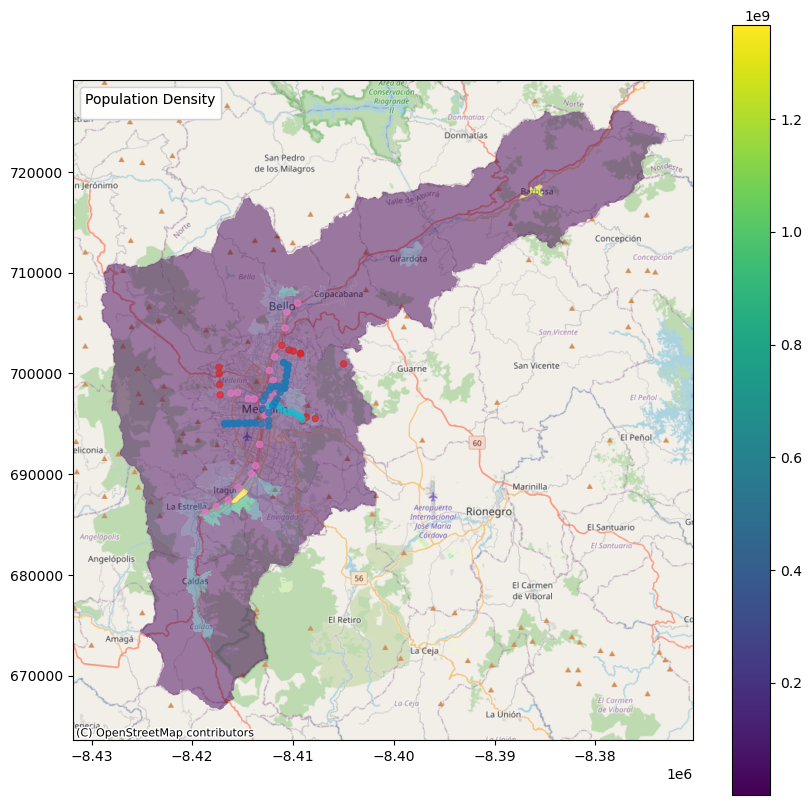

In [21]:
#plot and use osm as the basemap, and use alpha to make the map more transparent
import contextily as ctx

# 创建图形
fig, ax = plt.subplots(figsize=(10, 10))

# 绘制 final_df
final_df.to_crs(epsg=3857).plot(column='pop_density', ax=ax, legend=True, alpha=0.5)

# 绘制 metro_gdf，并隐藏默认图例
metro_gdf.to_crs(epsg=3857).plot(ax=ax, column='type', legend=False, alpha=0.7, markersize=20)

# 添加 OpenStreetMap Mapnik 底图
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 获取所有图例项（handles 和 labels）
handles, labels = ax.get_legend_handles_labels()

# 绘制 final_df 的图例
final_df_legend = ax.legend(handles[:len(final_df['pop_density'].unique())], labels[:len(final_df['pop_density'].unique())], loc='upper left', title='Population Density')

# 添加地铁站图例
#metro_handles, metro_labels = metro_gdf.to_crs(epsg=3857).plot(column='type', legend=True, alpha=0.7, markersize=20).get_legend_handles_labels()
#metro_legend = ax.legend(metro_handles, metro_labels, loc='upper right', title='Metro Station Types')

# 添加图例到轴中，并确保两个图例不会重叠
ax.add_artist(final_df_legend)

plt.show()

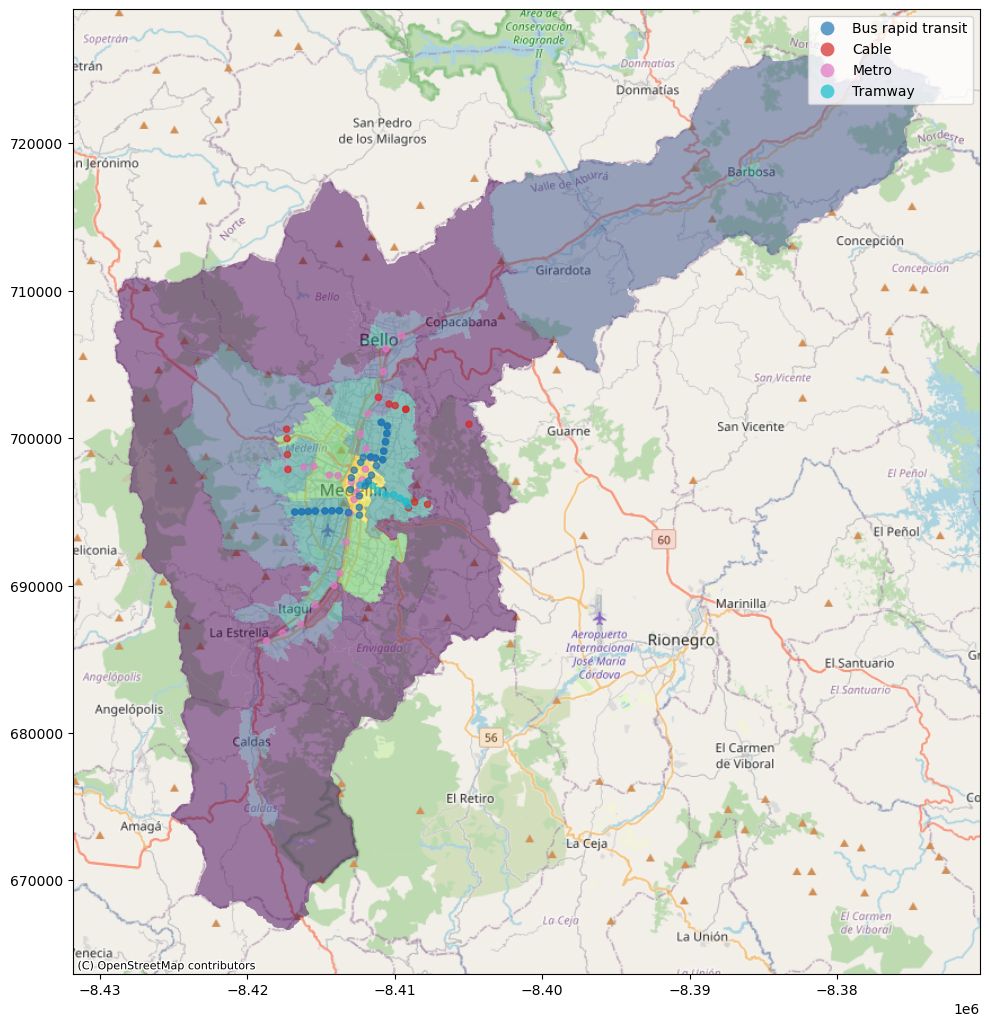

In [22]:
# 创建图形
fig, ax = plt.subplots(figsize=(10, 15))

# 绘制 final_df，使用 Fisher-Jenks 分类方案和 viridis 颜色映射
final_df.to_crs(epsg=3857).plot(column='total_flow', ax=ax, legend=True, alpha=0.5, scheme='FisherJenks')

# 绘制 metro_gdf，按 'type' 列进行分类
metro_gdf.to_crs(epsg=3857).plot(ax=ax, column='type', legend=True, alpha=0.7, markersize=20)

# 添加 OpenStreetMap Mapnik 底图
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# 调整和显示图例
handles, labels = ax.get_legend_handles_labels()
# tight layout
plt.tight_layout()
plt.show()

<Axes: >

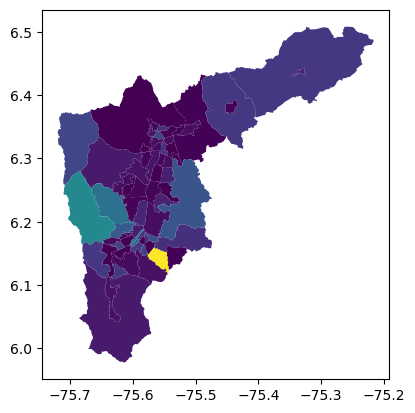

In [23]:
final_df.plot('num_firms')


<Axes: >

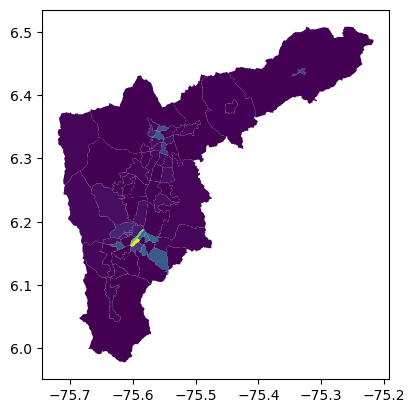

In [24]:
final_df.plot('firms_density')

<Axes: >

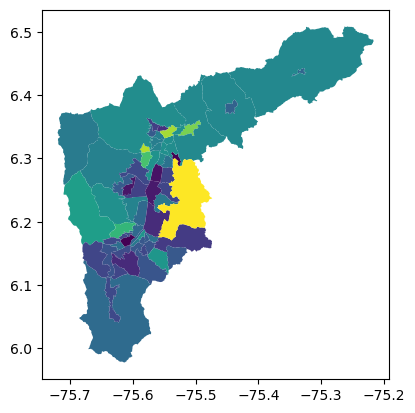

In [25]:
final_df.plot('stratum')

In [26]:
metro_gdf = gpd.GeoDataFrame(metro_df, geometry = [Point(xy) for xy in zip(metro_df['lon'], metro_df['lat'])])
metro_gdf.set_crs(final_df.crs, inplace=True)

stop line               type       lat        lon  \
0                 Bello    A              Metro  6.329956 -75.553739   
1          Palos verdes   L1  Bus rapid transit  6.262568 -75.555802   
2                Gardel   L1  Bus rapid transit  6.267816 -75.555075   
3              Manrique   L1  Bus rapid transit  6.273676 -75.554045   
4        Las Esmeraldas   L1  Bus rapid transit  6.278548 -75.553203   
..                  ...  ...                ...       ...        ...   
89              Oriente  T-A            Tramway  6.234861 -75.540188   
90               Arvâ€™    L              Cable  6.284104 -75.503136   
91              Popular    K              Cable  6.295408 -75.548077   
92  Santo Domingo Savio    K              Cable  6.293172 -75.541621   
93  Santo Domingo Savio    L              Cable  6.293172 -75.541621   

                     geometry  
0   POINT (-75.55374 6.32996)  
1   POINT (-75.55580 6.26257)  
2   POINT (-75.55508 6.26782)  
3   POINT (-75.55405 6.27368)  
4   POINT (-75.55320 6.27855)  
..                        ...  
89  POINT (-75.54019 6.23486)  
90  POINT (-75.50314 6.28410)  
91  POINT (-75.54808 6.29541)  
92  POINT (-75.54162 6.29317)  
93  POINT (-75.54162 6.29317)  

[94 rows x 6 columns]

In [27]:
metro_gdf

stop line               type       lat        lon  \
0                 Bello    A              Metro  6.329956 -75.553739   
1          Palos verdes   L1  Bus rapid transit  6.262568 -75.555802   
2                Gardel   L1  Bus rapid transit  6.267816 -75.555075   
3              Manrique   L1  Bus rapid transit  6.273676 -75.554045   
4        Las Esmeraldas   L1  Bus rapid transit  6.278548 -75.553203   
..                  ...  ...                ...       ...        ...   
89              Oriente  T-A            Tramway  6.234861 -75.540188   
90               Arvâ€™    L              Cable  6.284104 -75.503136   
91              Popular    K              Cable  6.295408 -75.548077   
92  Santo Domingo Savio    K              Cable  6.293172 -75.541621   
93  Santo Domingo Savio    L              Cable  6.293172 -75.541621   

                     geometry  
0   POINT (-75.55374 6.32996)  
1   POINT (-75.55580 6.26257)  
2   POINT (-75.55508 6.26782)  
3   POINT (-75.55405 6.27368)  
4   POINT (-75.55320 6.27855)  
..                        ...  
89  POINT (-75.54019 6.23486)  
90  POINT (-75.50314 6.28410)  
91  POINT (-75.54808 6.29541)  
92  POINT (-75.54162 6.29317)  
93  POINT (-75.54162 6.29317)  

[94 rows x 6 columns]

In [28]:
metro_stations = metro_gdf.loc[metro_gdf['type']=='Metro']
bus_stations = metro_gdf.loc[metro_gdf['type']=='Bus rapid transit']
cable_stations = metro_gdf.loc[metro_gdf['type']=='Tramway']
tram_stations = metro_gdf.loc[metro_gdf['type']=='Cable']

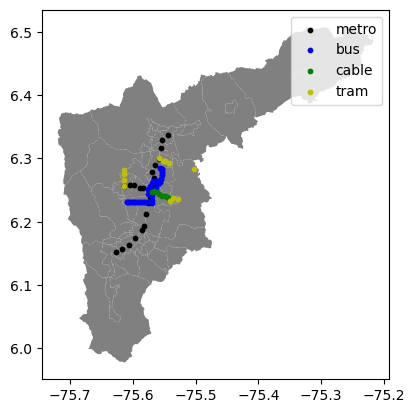

In [29]:
f, ax = plt.subplots()
final_df.plot(ax = ax, color = 'grey')
metro_stations.plot(ax = ax, color='k', markersize=10, label = 'metro')
bus_stations.plot(ax = ax, color='b', markersize=10, label = 'bus')
cable_stations.plot(ax = ax, color='g', markersize=10, label = 'cable')
tram_stations.plot(ax = ax, color='y', markersize=10, label = 'tram')
ax.legend()

In [30]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import os
import pandas as pd
from shapely.ops import unary_union
import folium
import numpy as np
import random

In [31]:
communa_gdf = gpd.read_file('data/comunas_boundaries/MACROZONAS.shp')
# check the crs
print(communa_gdf.crs)
# merge all the polygons into one, and save to as shapely.geometry.Polygon
union_polygon = unary_union(communa_gdf['geometry'])
# check crs of union_polygon
print(union_polygon)


EPSG:4326
POLYGON ((-75.57061502219904 6.100906193531557, -75.57076202083846 6.100655191309727, -75.5710230198523 6.100463188715651, -75.57132101979045 6.1002341862673575, -75.57146401992594 6.100151184807942, -75.57168302072324 6.100079183186381, -75.57192301995991 6.0999761803769275, -75.57236602255318 6.099806174355024, -75.57285302203115 6.099562169849378, -75.57307702228445 6.099399167062245, -75.57311602213605 6.099370166176129, -75.57340902079125 6.09915216400816, -75.57348402141787 6.09907516189395, -75.57354402055728 6.099058161720961, -75.57374602112861 6.098997159174303, -75.57394402283501 6.098918157971411, -75.57411202005665 6.0987361557128, -75.57421001977298 6.098644155704278, -75.57434702085618 6.098593154164064, -75.57444801971371 6.098415152939992, -75.57452301875492 6.0982831511640825, -75.57456501754035 6.098127151365929, -75.57466101545788 6.09795515129025, -75.57474101441244 6.09775015026554, -75.57477401279903 6.097664150141725, -75.57485001187035 6.0975841490838

epsg:4326


<Axes: >

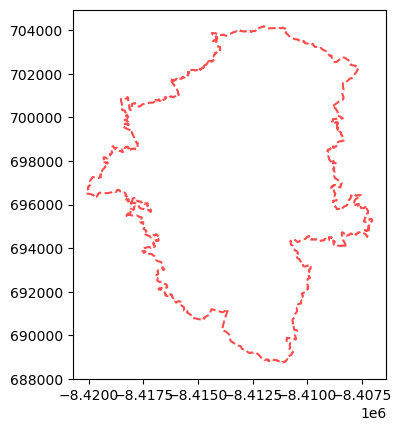

In [32]:
# download the Medellin's boundary from OSM
medellin_boundary = ox.geocode_to_gdf('Medellin, Colombia')
# check the crs of medellin_boundary
print(medellin_boundary.crs)
# change the crs to EPSG 3857
medellin_boundary = medellin_boundary.to_crs(epsg=3857)
# plot the boundary only with boundary, fill corlor with none
medellin_boundary.plot(facecolor='none', edgecolor='red', linewidth=1.5, linestyle='--', alpha=0.7)

In [33]:
# use the boundary to clip the graph, get the subgraph
G_drive = ox.graph_from_polygon(union_polygon, network_type='drive')

In [34]:
print(f"Original CRS: {G_drive.graph['crs']}")

Original CRS: epsg:4326


In [35]:
# check how many nodes and edges in the graph
print(f"Number of nodes: {len(G_drive.nodes)}")
# check if the network is a directed graph
print(f"Is the graph directed? {nx.is_directed(G_drive)}")

Number of nodes: 30128
Is the graph directed? True


In [36]:
# change the graph to an undirected graph
G_drive_undirected = G_drive.to_undirected()

In [37]:
# check if the network is fully connected
print(f"Is the graph fully connected? {nx.is_connected(G_drive_undirected)}")

Is the graph fully connected? True


In [38]:
# check the first 10 nodes in the graph and their attributes
list(G_drive_undirected.nodes(data=True))[:10]


[(287291500, {'y': 6.38973, 'x': -75.4472874, 'street_count': 3}),
 (287291520, {'y': 6.3830915, 'x': -75.4707836, 'street_count': 3}),
 (287291575, {'y': 6.3465072, 'x': -75.5219367, 'street_count': 3}),
 (287291580, {'y': 6.3446498, 'x': -75.5301702, 'street_count': 3}),
 (287291588, {'y': 6.3384773, 'x': -75.542407, 'street_count': 3}),
 (287291654, {'y': 6.3946485, 'x': -75.44069, 'street_count': 3}),
 (287291691, {'y': 6.3413781, 'x': -75.5361037, 'street_count': 3}),
 (287291818, {'y': 6.4336309, 'x': -75.3727201, 'street_count': 3}),
 (287291824, {'y': 6.4326821, 'x': -75.3730849, 'street_count': 3}),
 (287291921, {'y': 6.4198207, 'x': -75.3922324, 'street_count': 3})]

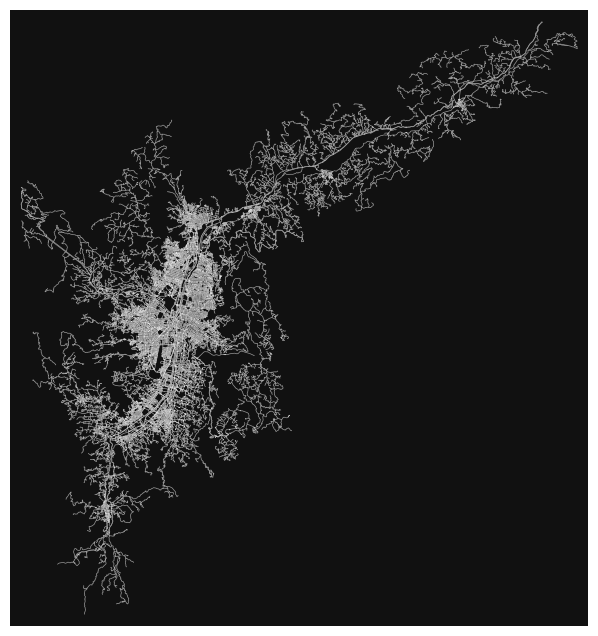

In [39]:
# plot the graph, figure size is 2000x2000 pixels, and add a map where label the coordinates
fig, ax = ox.plot_graph(G_drive_undirected, node_size=0.1, edge_linewidth=0.5, show=False, close=False)
plt.show()


In [40]:
# get the first node's attributes
node = list(G_drive_undirected.nodes(data=True))[0]
node

(287291500, {'y': 6.38973, 'x': -75.4472874, 'street_count': 3})

In [41]:

# get the first edge's attributes
edge = list(G_drive_undirected.edges(data=True))[0]
edge

(287291500,
 5384979378,
 {'osmid': 737517930,
  'oneway': True,
  'lanes': '3',
  'ref': '25',
  'name': 'Doble calzada Niquia - Hatillo',
  'highway': 'trunk',
  'reversed': False,
  'length': 123.239,
  'geometry': <LINESTRING (-75.447 6.39, -75.448 6.389, -75.448 6.389)>})

In [42]:
# 获取街道网络的节点和边的数据
nodes, edges = ox.graph_to_gdfs(G_drive_undirected)

# 计算城市的中心点
center_point = (nodes['y'].mean(), nodes['x'].mean())

# 创建Folium地图对象
m = folium.Map(location=center_point, zoom_start=11)

# 添加街道网络到地图
for _, row in edges.iterrows():
    points = [(row['geometry'].coords[0][1], row['geometry'].coords[0][0]), 
              (row['geometry'].coords[-1][1], row['geometry'].coords[-1][0])]
    folium.PolyLine(points, color='blue', weight=2.5, opacity=1).add_to(m)

# 保存地图为HTML文件
#m.save('medellin_street_network.html')

# 如果你在Jupyter Notebook中，可以直接显示地图
#m

### calculate the distance matrix

In [43]:
def nodes_in_borough(graph, borough_polygon):
    nodes = []
    for node in graph.nodes():
        point = Point(graph.nodes[node]['x'], graph.nodes[node]['y'])
        if borough_polygon.contains(point):
            nodes.append(node)
    return nodes
    
def calculate_betweenness_centrality(graph):
    # calculateh all 
    approx_betweenness = nx.approximate_current_flow_betweenness_centrality(graph, weight='weight', epsilon=0.1)
    # 按介数中心性排序
    sorted_approx_betweenness = sorted(approx_betweenness.items(), key=lambda item: item[1], reverse=True)
    return sorted_approx_betweenness

def select_random_nodes_by_borough(boroughs, demand_nodes_per_borough):
    borough_top_nodes = {}
    for borough, nodes in boroughs.items():
        if len(nodes) < demand_nodes_per_borough[borough]:
            raise ValueError(f"Not enough nodes in {borough} to meet the demand")
        borough_top_nodes[borough] = random.sample(nodes, demand_nodes_per_borough[borough])
    return borough_top_nodes

def shortest_path_distance_matrix(graph, source_nodes, target_nodes):
    # 创建距离矩阵
    distance_matrix = np.zeros((len(source_nodes), len(target_nodes)))

    # 计算从每个source到每个target的最短路径
    for i, source in enumerate(source_nodes):
        for j, target in enumerate(target_nodes):
            try:
                distance_matrix[i][j] = nx.shortest_path_length(graph, source=source, target=target, weight='weight')
            except nx.NetworkXNoPath:
                distance_matrix[i][j] = float('inf')  # 如果没有路径，设置为无穷大

    return distance_matrix

**We need to assign all demands points and supply points for different scenarios**

In [44]:
final_df['num_firms'].describe()

count       66.000000
mean      2447.515152
std       3704.455726
min          0.000000
25%        217.000000
50%        970.500000
75%       3431.750000
max      23778.000000
Name: num_firms, dtype: float64

In [45]:

boroughs = {}
for idx, row in final_df.iterrows():
    borough_name = row['comuna_index'] 
    borough_polygon = row['geometry']
    nodes = nodes_in_borough(G_drive_undirected, borough_polygon)
    boroughs[borough_name] = nodes

In [46]:
# create a dictionary where 'comuna_index' as the key, and the value is 'Num_demand_points' column
demand_nodes_per_borough = final_df.set_index('comuna_index')['Num_demand_points'].to_dict()
dest_nodes_per_borough = final_df.set_index('comuna_index')['Num_demand_points'].to_dict()
poor_nodes_per_borough = final_df.set_index('comuna_index')['Poor_demand_level'].to_dict()
firms_nodes_per_borough = final_df.set_index('comuna_index')['Num_firms_points'].to_dict()

# 随机选取每个borough中的N个节点
borough_origin_nodes = select_random_nodes_by_borough(boroughs, demand_nodes_per_borough)
borough_dest_nodes = select_random_nodes_by_borough(boroughs, dest_nodes_per_borough)
borough_poor_nodes = select_random_nodes_by_borough(boroughs, poor_nodes_per_borough)
borough_firm_nodes = select_random_nodes_by_borough(boroughs, firms_nodes_per_borough)


In [47]:
# check G_drive's crs

import osmnx as ox
import contextily as ctx

In [48]:
# check final_df's crs abnd change it to EPSG 3857 for plotting
print(final_df.crs)
final_df = final_df.to_crs(epsg=3857)

EPSG:4326


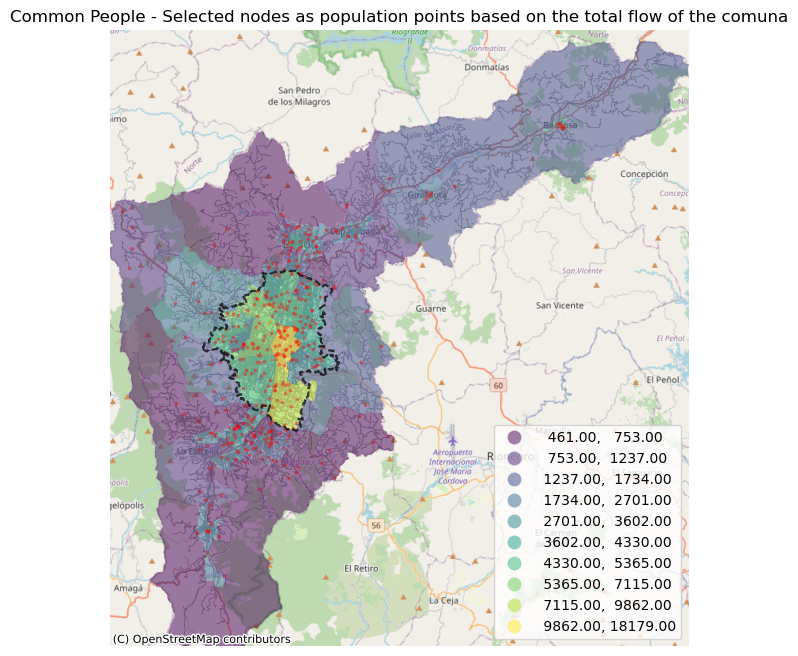

In [49]:
# change the crs of G_drive_undirected to EPSG 3857
G_drive_undirected = ox.project_graph(G_drive_undirected, to_crs='EPSG:3857')
# Create the graph plot
fig, ax = ox.plot_graph(G_drive_undirected, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Add OSM black and white basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# add the comuna.gdf, use 'total_flow' as the color
final_df.plot(ax=ax, column='total_flow', legend=True, alpha=0.5, scheme='FisherJenks',k=10)

# Plot the selected nodes in red
for borough, nodes in borough_origin_nodes.items():
    for node in nodes:
        ax.scatter(G_drive_undirected.nodes[node]['x'], G_drive_undirected.nodes[node]['y'], color='red', s=3, alpha=0.3, edgecolor=None)

# Adjust plot limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# add the title for the plot
plt.title('Common People - Selected nodes as population points based on the total flow of the comuna')
# make the background of the plot is white
ax.set_facecolor('white')
# plot the medellin boundary
medellin_boundary.plot(facecolor='none', edgecolor='black', linewidth=1.5, linestyle='--', alpha=0.7, ax=ax)
# Show plot
plt.show()
# save the plot
fig.savefig('Results/selected_origin_nodes.png', dpi=300)

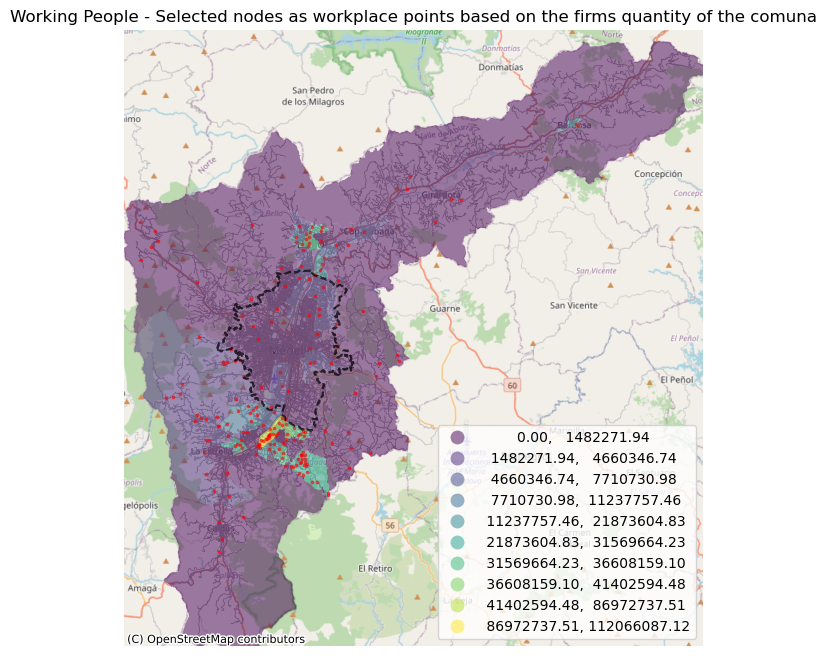

In [50]:
# change the crs of G_drive_undirected to EPSG 3857
G_drive_undirected = ox.project_graph(G_drive_undirected, to_crs='EPSG:3857')
# Create the graph plot
fig, ax = ox.plot_graph(G_drive_undirected, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Add OSM black and white basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# add the comuna.gdf, use 'total_flow' as the color
final_df.plot(ax=ax, column='firms_density', legend=True, alpha=0.5, scheme='FisherJenks',k=10)

# Plot the selected nodes in red
for borough, nodes in borough_firm_nodes.items():
    for node in nodes:
        ax.scatter(G_drive_undirected.nodes[node]['x'], G_drive_undirected.nodes[node]['y'], color='red', s=3, alpha=0.5, edgecolor=None)

# Adjust plot limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# add the title for the plot
plt.title('Working People - Selected nodes as workplace points based on the firms quantity of the comuna')
# make the background of the plot is white
ax.set_facecolor('black')
# plot the medellin boundary
medellin_boundary.plot(facecolor='none', edgecolor='black', linewidth=1.5, linestyle='--', alpha=0.7, ax=ax)
# Show plot
plt.show()
# save the plot
fig.savefig('Results/selected_firm_nodes.png', dpi=300)

In [51]:
# check the crs of G_drive_undirected
print(G_drive_undirected.graph['crs'])

EPSG:3857


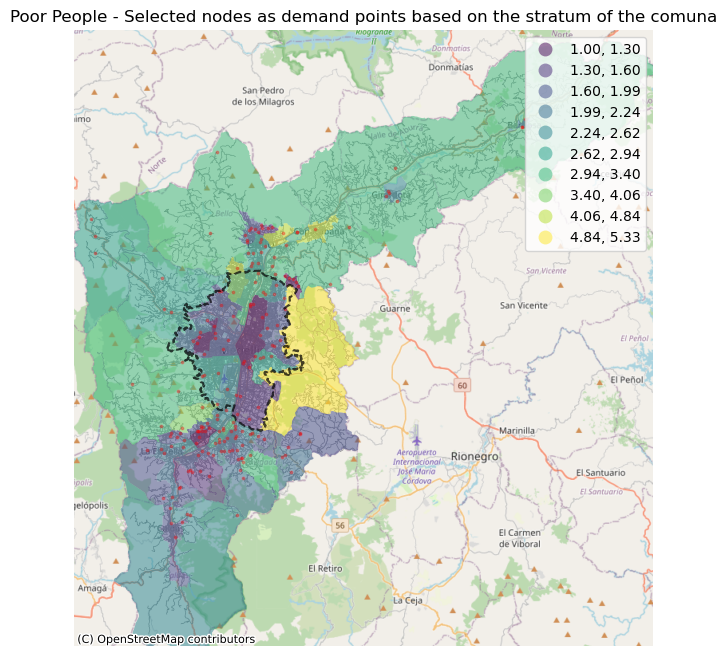

In [52]:
# change the crs of G_drive_undirected to EPSG 3857
G_drive_undirected = ox.project_graph(G_drive_undirected, to_crs='EPSG:3857')
# Create the graph plot
fig, ax = ox.plot_graph(G_drive_undirected, node_size=0, edge_linewidth=0.5, show=False, close=False)

# Add OSM black and white basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# add the comuna.gdf, use 'total_flow' as the color
final_df.plot(ax=ax, column='stratum', legend=True, alpha=0.5, scheme='FisherJenks',k=10)

# Plot the selected nodes in red
for borough, nodes in borough_poor_nodes.items():
    for node in nodes:
        ax.scatter(G_drive_undirected.nodes[node]['x'], G_drive_undirected.nodes[node]['y'], color='red', s=3, alpha=0.3, edgecolor=None)

# Adjust plot limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.set_xlim(xlim)
ax.set_ylim(ylim)
# add the title for the plot
plt.title('Poor People - Selected nodes as demand points based on the stratum of the comuna')
# make the background of the plot is whit
ax.set_facecolor('white')
# plot the medellin boundary
medellin_boundary.plot(facecolor='none', edgecolor='black', linewidth=1.5, linestyle='--', alpha=0.7, ax=ax)
# Show plot
plt.show()
# save the plot
fig.savefig('Results/selected_poor_nodes.png', dpi=300)

In [53]:
# check how many nodes in total

print(f"Total number of origin nodes: {sum([len(nodes) for nodes in borough_origin_nodes.values()])}.Total number of firms nodes: {sum([len(nodes) for nodes in borough_firm_nodes.values()])}.Total number of poor nodes: {sum([len(nodes) for nodes in borough_poor_nodes.values()])}")

Total number of origin nodes: 409.Total number of firms nodes: 195.Total number of poor nodes: 193


**Now we can construct the current metro way system**

In [54]:
line_list = metro_gdf['line'].unique().tolist()
line_list

['A', 'L1', 'L2', 'K', 'J', 'B', 'T-A', 'H', 'L']

In [55]:
metro_gdf
# join the stratum_df into the metro_gdf based on the 'comuna_index' column, before join delete the muni_index column in the stratum_df


stop line               type       lat        lon  \
0                 Bello    A              Metro  6.329956 -75.553739   
1          Palos verdes   L1  Bus rapid transit  6.262568 -75.555802   
2                Gardel   L1  Bus rapid transit  6.267816 -75.555075   
3              Manrique   L1  Bus rapid transit  6.273676 -75.554045   
4        Las Esmeraldas   L1  Bus rapid transit  6.278548 -75.553203   
..                  ...  ...                ...       ...        ...   
89              Oriente  T-A            Tramway  6.234861 -75.540188   
90               Arvâ€™    L              Cable  6.284104 -75.503136   
91              Popular    K              Cable  6.295408 -75.548077   
92  Santo Domingo Savio    K              Cable  6.293172 -75.541621   
93  Santo Domingo Savio    L              Cable  6.293172 -75.541621   

                     geometry  
0   POINT (-75.55374 6.32996)  
1   POINT (-75.55580 6.26257)  
2   POINT (-75.55508 6.26782)  
3   POINT (-75.55405 6.27368)  
4   POINT (-75.55320 6.27855)  
..                        ...  
89  POINT (-75.54019 6.23486)  
90  POINT (-75.50314 6.28410)  
91  POINT (-75.54808 6.29541)  
92  POINT (-75.54162 6.29317)  
93  POINT (-75.54162 6.29317)  

[94 rows x 6 columns]

In [56]:
import networkx as nx
import osmnx as ox
import geopandas as gpd
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 初始化一个无向图
G_metro = nx.Graph()

# 设定整个graph的crs与G_drive的crs一致
G_metro.graph['crs'] = G_drive.graph['crs']

# check the crs
print(G_metro.graph['crs'])
print(G_drive.graph['crs'])

epsg:4326
epsg:4326


In [58]:
# 向G_metro图中添加节点。节点的名称为 stop 和 line 这两列的组合，节点属性包含坐标
# add nodes to the G_metro graph. The node name is the combination of stop and line columns, and the node attribute contains the coordinates
for idx, row in metro_gdf.iterrows():
    stop = row['stop']
    stop_type = row['line']
    coord = (row['lon'], row['lat'])
    
    # 添加节点，节点的名称为 stop 和 stop_type 的组合，节点属性包含坐标
    G_metro.add_node((stop, stop_type), pos=coord)




for idx, row in metro_gdf.iterrows():
    stop = row['stop']
    line = row['line']
    coord = (row['lon'], row['lat'])
    
    # 添加节点，节点的名称为 stop 和 stop_type 的组合，节点属性包含坐标
    G_metro.add_node((stop, line), pos=coord)


In [59]:

# 按照 line 这一列，按照csv列表中的顺序，依次连接各个站点
# connect the stations in the order of the csv list according to the line column
# 需要注意的是，各种不同路线可能是交互出现的，因此需要先filter出每种line的数据，然后再依次连接
# It should be noted that different lines may appear alternately, so it is necessary to filter out the data of each line first, and then connect them in turn

# 获取所有的线路
lines = metro_gdf['line'].unique()

# 遍历每一条线路
for line in lines:
    # 获取这条线路的数据
    line_data = metro_gdf[metro_gdf['line'] == line]
    # 按照csv列表中的顺序，依次连接各个站点
    for i in range(len(line_data)-1):
        # 获取相邻两个站点的名称
        stop1 = line_data.iloc[i]['stop']
        stop2 = line_data.iloc[i+1]['stop']
        # 添加边
        G_metro.add_edge((stop1, line), (stop2, line))


In [60]:

# 检查是否有stop相同但line不同的站点，将这些换乘站点也连接起来
# check if there are stations with the same stop but different lines, and connect these transfer stations
for stop in metro_gdf['stop'].unique():
    stop_df = metro_gdf.loc[metro_gdf['stop'] == stop]
    if len(stop_df) > 1:
        for i in range(len(stop_df)-1):
            current_row = stop_df.iloc[i]
            next_row = stop_df.iloc[i+1]
            if current_row['line'] != next_row['line']:
                G_metro.add_edge((current_row['stop'], current_row['line']), (next_row['stop'], next_row['line']))



In [61]:
#check the first 10 nodes and edges
list(G_metro.nodes(data=True))[:5]

[(('Bello', 'A'), {'pos': (-75.55373852, 6.329955914)}),
 (('Palos verdes', 'L1'), {'pos': (-75.5558023, 6.262567819)}),
 (('Gardel', 'L1'), {'pos': (-75.55507534, 6.267815728)}),
 (('Manrique', 'L1'), {'pos': (-75.55404513, 6.273675784)}),
 (('Las Esmeraldas', 'L1'), {'pos': (-75.5532031, 6.278548118)})]

In [62]:
list(G_metro.edges(data=True))[:5]

[(('Bello', 'A'), ('Niquâ€™a', 'A'), {}),
 (('Palos verdes', 'L1'), ('Gardel', 'L1'), {}),
 (('Palos verdes', 'L1'), ('Palos verdes', 'L2'), {}),
 (('Gardel', 'L1'), ('Manrique', 'L1'), {}),
 (('Gardel', 'L1'), ('Gardel', 'L2'), {})]

In [63]:
# calculate the euclidean distance for each edge as weight, and add the weight to the edges' attributes, and remember that current crs is 4326
for u, v, data in G_metro.edges(data=True):
    # get the coordinates of the two nodes
    coord1 = G_metro.nodes[u]['pos']
    coord2 = G_metro.nodes[v]['pos']
    # calculate the euclidean distance to integer
    distance = geodesic(coord1, coord2).meters
    # weight数值四舍五入到整数
    distance = round(distance)
    # add the distance to the edge's attributes
    data['weight'] = distance

ValueError: too many values to unpack (expected 3)

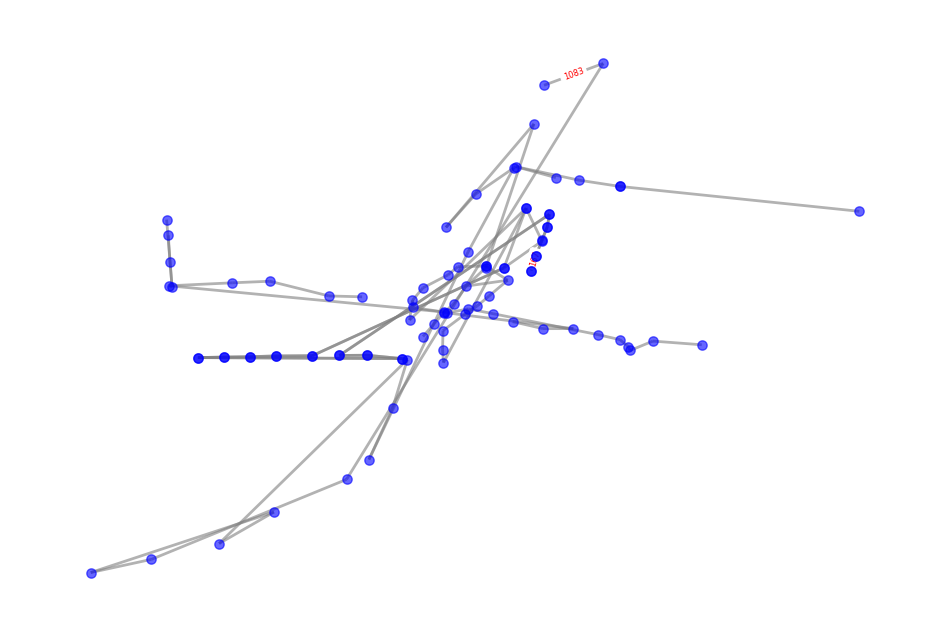

In [64]:
# 添加 crs 信息
G_metro.graph['crs'] = "EPSG:4326"

# 绘制图形
pos = nx.get_node_attributes(G_metro, 'pos')
edge_labels = nx.get_edge_attributes(G_metro, 'weight')

fig, ax = plt.subplots(figsize=(12, 8))

# add the osm basemap
#ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

nx.draw(G_metro, pos, with_labels=False, node_color='blue', node_size=45, alpha=0.6, edge_color='grey', width=2, font_size=8, ax=ax)
nx.draw_networkx_edge_labels(G_metro, pos, edge_labels=edge_labels, font_color='red', ax=ax, font_size=6)
# add the axis
plt.axis('on')
#add the title
plt.show()

In [65]:
# check the first 10 nodes and edges
list(G_metro.nodes(data=True))[:5]


[(('Bello', 'A'), {'pos': (-75.55373852, 6.329955914)}),
 (('Palos verdes', 'L1'), {'pos': (-75.5558023, 6.262567819)}),
 (('Gardel', 'L1'), {'pos': (-75.55507534, 6.267815728)}),
 (('Manrique', 'L1'), {'pos': (-75.55404513, 6.273675784)}),
 (('Las Esmeraldas', 'L1'), {'pos': (-75.5532031, 6.278548118)})]

In [66]:
# check the number of nodes in the graph G_metro
print(f"Number of nodes: {G_metro.number_of_nodes()}")
print(f"Number of edges: {G_metro.number_of_edges()}")


Number of nodes: 94
Number of edges: 112


In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

In [68]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

In [69]:
def find_nearest_node(node_coords, point):
    """Find the nearest node to a given point based on coordinates."""
    distances = {node: euclidean(coord, point) for node, coord in node_coords.items()}
    nearest_node = min(distances, key=distances.get)
    return nearest_node

def compute_distance_matrix(G, source_points, target_points, node_coords):
    # Find nearest nodes for each source and target point
    nearest_sources = [find_nearest_node(node_coords, point) for point in source_points]
    nearest_targets = [find_nearest_node(node_coords, point) for point in target_points]

    # Initialize the distance matrix with inf (indicating unreachable)
    distance_matrix = np.full((len(source_points), len(target_points)), float('inf'))

    # Compute shortest path lengths between each pair of nearest source and target nodes
    for i, source in enumerate(nearest_sources):
        lengths = nx.single_source_dijkstra_path_length(G, source)
        for j, target in enumerate(nearest_targets):
            distance_matrix[i][j] = lengths.get(target, float('inf'))

    # Convert to a pandas DataFrame for better visualization
    distance_df = pd.DataFrame(distance_matrix, index=source_points, columns=target_points)
    return distance_df

In [70]:
# get the origin nodes' coordinates from the graph's each node's attributes 'x' and 'y', where the key is the node index
origin_node_coords = {node: (data['x'], data['y']) for node, data in G_drive.nodes(data=True) if node in sum(borough_origin_nodes.values(), [])}
# get the firm nodes' coordinates from the graph's each node's attributes 'x' and 'y', where the key is the node index
firm_node_coords = {node: (data['x'], data['y']) for node, data in G_drive.nodes(data=True) if node in sum(borough_firm_nodes.values(), [])}
# get the poor nodes' coordinates from the graph's each node's attributes 'x' and 'y', where the key is the node index
poor_node_coords = {node: (data['x'], data['y']) for node, data in G_drive.nodes(data=True) if node in sum(borough_poor_nodes.values(), [])}

In [71]:
# assign the source_points and target_points
source_points = [node for node in origin_node_coords.values()]
target_firm_points = [node for node in firm_node_coords.values()]
target_dest_points = [node for node in origin_node_coords.values()]
target_poor_points = [node for node in poor_node_coords.values()]

In [72]:
# get the each nodes' coord in G_metro graph
metro_node_coords = {node: (data['pos'][0], data['pos'][1]) for node, data in G_metro.nodes(data=True)}

In [73]:
# Compute the distance matrix
distance_matrix_SC1 = compute_distance_matrix(G_metro, source_points, target_dest_points, metro_node_coords)
distance_matrix_SC2 = compute_distance_matrix(G_metro, source_points, target_firm_points, metro_node_coords)
distance_matrix_SC3 = compute_distance_matrix(G_metro, target_poor_points, target_firm_points, metro_node_coords)
#print(distance_matrix)

In [74]:
distance_matrix_SC1

(-75.5684027, 6.2078564)  (-75.5764901, 6.2480521)  \
(-75.5684027, 6.2078564)                       0.0                    9193.0   
(-75.5764901, 6.2480521)                    9193.0                       0.0   
(-75.5735176, 6.248581)                     9193.0                       0.0   
(-75.5581149, 6.3298526)                   20778.0                   28865.0   
(-75.5900262, 6.2396568)                    6355.0                    6925.0   
...                                            ...                       ...   
(-75.5521521, 6.2547421)                    9984.0                    1801.0   
(-75.5759667, 6.1658041)                   13458.0                   21545.0   
(-75.6023228, 6.1672603)                    4404.0                   12491.0   
(-75.5370928, 6.1474765)                   13458.0                   21545.0   
(-75.6093923, 6.1578123)                    4404.0                   12491.0   

                          (-75.5735176, 6.248581)  (-75.5581149, 6.3298526)  \
(-75.5684027, 6.2078564)                   9193.0                   20778.0   
(-75.5764901, 6.2480521)                      0.0                   28865.0   
(-75.5735176, 6.248581)                       0.0                   28865.0   
(-75.5581149, 6.3298526)                  28865.0                       0.0   
(-75.5900262, 6.2396568)                   6925.0                   26027.0   
...                                           ...                       ...   
(-75.5521521, 6.2547421)                   1801.0                   29954.0   
(-75.5759667, 6.1658041)                  21545.0                    7320.0   
(-75.6023228, 6.1672603)                  12491.0                   16374.0   
(-75.5370928, 6.1474765)                  21545.0                    7320.0   
(-75.6093923, 6.1578123)                  12491.0                   16374.0   

                          (-75.5900262, 6.2396568)  (-75.6094939, 6.2447863)  \
(-75.5684027, 6.2078564)                    6355.0                   14738.0   
(-75.5764901, 6.2480521)                    6925.0                    5545.0   
(-75.5735176, 6.248581)                     6925.0                    5545.0   
(-75.5581149, 6.3298526)                   26027.0                   34410.0   
(-75.5900262, 6.2396568)                       0.0                   12470.0   
...                                            ...                       ...   
(-75.5521521, 6.2547421)                    8014.0                    6222.0   
(-75.5759667, 6.1658041)                   18707.0                   27090.0   
(-75.6023228, 6.1672603)                    9653.0                   18036.0   
(-75.5370928, 6.1474765)                   18707.0                   27090.0   
(-75.6093923, 6.1578123)                    9653.0                   18036.0   

                          (-75.5588795, 6.3213314)  (-75.565648, 6.3201031)  \
(-75.5684027, 6.2078564)                    7862.0                   7862.0   
(-75.5764901, 6.2480521)                    3147.0                   3147.0   
(-75.5735176, 6.248581)                     3147.0                   3147.0   
(-75.5581149, 6.3298526)                   28640.0                  28640.0   
(-75.5900262, 6.2396568)                    9952.0                   9952.0   
...                                            ...                      ...   
(-75.5521521, 6.2547421)                    2122.0                   2122.0   
(-75.5759667, 6.1658041)                   21320.0                  21320.0   
(-75.6023228, 6.1672603)                   12266.0                  12266.0   
(-75.5370928, 6.1474765)                   21320.0                  21320.0   
(-75.6093923, 6.1578123)                   12266.0                  12266.0   

                          (-75.5713701, 6.32693)  (-75.5637818, 6.329608)  \
(-75.5684027, 6.2078564)                 20778.0                  20778.0   
(-75.5764901, 6.2480521)                 28865.0    

In [75]:
# calculate the maen value of the distance matrix, all values both row and column
current_mean_distance_SC1 = distance_matrix_SC1.mean().mean()
current_mean_distance_SC2 = distance_matrix_SC2.mean().mean()
current_mean_distance_SC3 = distance_matrix_SC3.mean().mean()

## Iteration

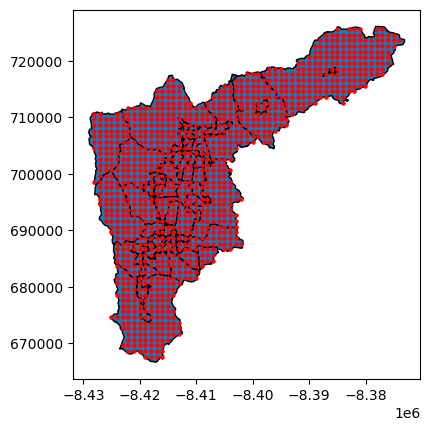

In [96]:
# generate the grid points inside the boundary of the communa_gdf, grid size is 500meters,but the crs of communas_gdf is 4326, so need to convert to 3857
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
# set the crs of the communa_gdf to 3857
communa_gdf = communa_gdf.to_crs(epsg=3857)

# get the boundary of the communa_gdf
boundary = communa_gdf['geometry'].unary_union
# set the grid size to 500 meters
grid_size = 1000
# 生成网格点
minx, miny, maxx, maxy = boundary.bounds
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)
grid_points = [Point(x, y) for x in x_coords for y in y_coords]

# 创建网格点的 GeoDataFrame
grid_gdf = gpd.GeoDataFrame(geometry=grid_points, crs=communa_gdf.crs)

# 使用 boundary 进行裁剪
grid_gdf = gpd.clip(grid_gdf, boundary)

# 可视化检查生成的网格点
ax = communa_gdf.plot(edgecolor='k')
grid_gdf.plot(ax=ax, color='red', markersize=5)
plt.show()

In [97]:
# check number of points in the grid_gdf
print(f"Number of grid points: {len(grid_gdf)}")

Number of grid points: 1174


In [98]:
"""# plot the grid points
fig, ax = plt.subplots(figsize=(10, 10))
communa_gdf.plot(ax=ax, color='lightgrey')
grid_gdf.plot(ax=ax, color='red', markersize=1)
plt.show()"""

"# plot the grid points\nfig, ax = plt.subplots(figsize=(10, 10))\ncommuna_gdf.plot(ax=ax, color='lightgrey')\ngrid_gdf.plot(ax=ax, color='red', markersize=1)\nplt.show()"

In [99]:
# add new columns to the result_gdf , new columns should be 'candidate_point', 'geometry', 'Sce1_value', 'Sce1_line', 'Sce2_value', 'Sce2_line', 'Sce3_value', 'Sce3_line'
result_gdf = grid_gdf.copy()
result_gdf['OD_value'] = None
result_gdf['OD_station'] = None
result_gdf['Firm_value'] = None
result_gdf['Firm_station'] = None
result_gdf['Poor_value'] = None
result_gdf['Poor_station'] = None
# reset the index
result_gdf = result_gdf.reset_index(drop=True)
# add a id column to the result_gdf same with the index
result_gdf['id'] = result_gdf.index
result_gdf

geometry OD_value OD_station Firm_value  \
0     POINT (-8422042.037 668618.474)     None       None       None   
1     POINT (-8421042.037 668618.474)     None       None       None   
2     POINT (-8422042.037 669618.474)     None       None       None   
3     POINT (-8423042.037 669618.474)     None       None       None   
4     POINT (-8421042.037 669618.474)     None       None       None   
...                               ...      ...        ...        ...   
1169  POINT (-8421042.037 710618.474)     None       None       None   
1170  POINT (-8422042.037 710618.474)     None       None       None   
1171  POINT (-8421042.037 711618.474)     None       None       None   
1172  POINT (-8422042.037 711618.474)     None       None       None   
1173  POINT (-8401042.037 717618.474)     None       None       None   

     Firm_station Poor_value Poor_station    id  
0            None       None         None     0  
1            None       None         None     1  
2            None       None         None     2  
3            None       None         None     3  
4            None       None         None     4  
...           ...        ...          ...   ...  
1169         None       None         None  1169  
1170         None       None         None  1170  
1171         None       None         None  1171  
1172         None       None         None  1172  
1173         None       None         None  1173  

[1174 rows x 8 columns]

In [100]:
line_list

['A', 'L1', 'L2', 'K', 'J', 'B', 'T-A', 'H', 'L']

In [101]:
scenario_list = ['OD', 'Firm', 'Poor']

In [102]:
result_gdf

geometry OD_value OD_station Firm_value  \
0     POINT (-8422042.037 668618.474)     None       None       None   
1     POINT (-8421042.037 668618.474)     None       None       None   
2     POINT (-8422042.037 669618.474)     None       None       None   
3     POINT (-8423042.037 669618.474)     None       None       None   
4     POINT (-8421042.037 669618.474)     None       None       None   
...                               ...      ...        ...        ...   
1169  POINT (-8421042.037 710618.474)     None       None       None   
1170  POINT (-8422042.037 710618.474)     None       None       None   
1171  POINT (-8421042.037 711618.474)     None       None       None   
1172  POINT (-8422042.037 711618.474)     None       None       None   
1173  POINT (-8401042.037 717618.474)     None       None       None   

     Firm_station Poor_value Poor_station    id  
0            None       None         None     0  
1            None       None         None     1  
2            None       None         None     2  
3            None       None         None     3  
4            None       None         None     4  
...           ...        ...          ...   ...  
1169         None       None         None  1169  
1170         None       None         None  1170  
1171         None       None         None  1171  
1172         None       None         None  1172  
1173         None       None         None  1173  

[1174 rows x 8 columns]

In [103]:
# for loop from x=871 to x=1173



In [118]:
#### biG iteration

for iterat_num in range(1170, 1174):
    # take one point in the result_gdf
    test_point = result_gdf[result_gdf['id']==iterat_num]
    # change the crs of the test_point to 4326
    test_point = test_point.to_crs(epsg=4326)
    # add this point as a new node to the G_metro graph, and set the node's attributes, and the key is the point's index in the grid_gdf
    G_metro_newtest = G_metro.copy()
    G_metro_newtest.add_node(len(G_metro_newtest.nodes), pos=(test_point['geometry'].x.values[0], test_point['geometry'].y.values[0]))

    # create a temp dataframe to store the various scenarios' results for nine lines
    temp_df = pd.DataFrame(columns=['line', 'scenario', 'distance', 'station'])
    # 创建所有组合的 DataFrame
    index = pd.MultiIndex.from_product([line_list, scenario_list], names=['line', 'scenario'])
    temp_df = pd.DataFrame(index=index).reset_index()

    # 添加其他列
    temp_df['distance'] = None
    temp_df['station'] = None
    for line in line_list:
        # 获取线路中的节点
        nodes = [node for node, data in G_metro_newtest.nodes(data=True) if isinstance(node, tuple) and node[1] == line]
        
        # 获取新节点的坐标
        new_node_coords = G_metro_newtest.nodes[list(G_metro_newtest.nodes)[-1]]['pos']
        
        # 获取线路中最近的节点
        nearest_node = find_nearest_node({node: data['pos'] for node, data in G_metro_newtest.nodes(data=True) if node in nodes}, new_node_coords)
        
        # 添加新节点和最近节点之间的边
        G_metro_newtest.add_edge(list(G_metro_newtest.nodes)[-1], nearest_node, weight=geodesic(new_node_coords, G_metro_newtest.nodes[nearest_node]['pos']).meters, line=line)
        
        # 获取每个节点的坐标
        metro_node_coords = {node: (data['pos'][0], data['pos'][1]) for node, data in G_metro_newtest.nodes(data=True)}
        
        # 分别计算三种类型目标点的距离矩阵
        distance_matrix_new_dest = compute_distance_matrix(G_metro_newtest, source_points, target_dest_points, metro_node_coords)
        distance_matrix_new_firm = compute_distance_matrix(G_metro_newtest, source_points, target_firm_points, metro_node_coords)
        distance_matrix_new_poor = compute_distance_matrix(G_metro_newtest, target_poor_points, source_points, metro_node_coords)
        
        # 计算每个距离矩阵的平均值
        mean_distance_new_dest = distance_matrix_new_dest.mean().mean()
        mean_distance_new_firm = distance_matrix_new_firm.mean().mean()
        mean_distance_new_poor = distance_matrix_new_poor.mean().mean()
        
        # 将平均值添加到 temp_df 中对应的线路和场景
        temp_df.loc[(temp_df['line'] == line) & (temp_df['scenario'] == 'OD'), 'distance'] = mean_distance_new_dest
        temp_df.loc[(temp_df['line'] == line) & (temp_df['scenario'] == 'Firm'), 'distance'] = mean_distance_new_firm
        temp_df.loc[(temp_df['line'] == line) & (temp_df['scenario'] == 'Poor'), 'distance'] = mean_distance_new_poor
        
        # 获取最近节点的站名
        nearest_station = nearest_node[0]
        
        # 将站名添加到 temp_df
        temp_df.loc[temp_df['line'] == line, 'station'] = nearest_station
        # calculate the diff_distance between the new distance and the current mean_distance, IF 'scenario' is 'OD', 'Firm', 'Poor', then use the corresponding mean_distance
        temp_df['diff_distance'] = None
        temp_df.loc[temp_df['scenario'] == 'OD', 'diff_distance'] = temp_df['distance'] - current_mean_distance_SC1
        temp_df.loc[temp_df['scenario'] == 'Firm', 'diff_distance'] = temp_df['distance'] - current_mean_distance_SC2
        temp_df.loc[temp_df['scenario'] == 'Poor', 'diff_distance'] = temp_df['distance'] - current_mean_distance_SC3
        # only keep the rows with the lowest diff_distance for each scenario
        temp_df = temp_df.loc[temp_df.groupby('scenario')['diff_distance'].idxmin()]

    #print(temp_df)

    # add the values and stations to the result_gdf corresponding to the OD, Firm, and Poor scenarios based on the id
    result_gdf.loc[result_gdf['id'] == iterat_num, 'OD_value'] = temp_df.loc[temp_df['scenario'] == 'OD', 'distance'].values[0]
    result_gdf.loc[result_gdf['id'] == iterat_num, 'Firm_value'] = temp_df.loc[temp_df['scenario'] == 'Firm', 'distance'].values[0]
    result_gdf.loc[result_gdf['id'] == iterat_num, 'Poor_value'] = temp_df.loc[temp_df['scenario'] == 'Poor', 'distance'].values[0]
    result_gdf.loc[result_gdf['id'] == iterat_num, 'OD_station'] = temp_df.loc[temp_df['scenario'] == 'OD', 'station'].values[0]
    result_gdf.loc[result_gdf['id'] == iterat_num, 'Firm_station'] = temp_df.loc[temp_df['scenario'] == 'Firm', 'station'].values[0]
    result_gdf.loc[result_gdf['id'] == iterat_num, 'Poor_station'] = temp_df.loc[temp_df['scenario'] == 'Poor', 'station'].values[0]



In [112]:
#check the 120th row in the result_gdf
result_gdf.loc[1170]

geometry        POINT (-8422042.0371483 710618.4740130627)
OD_value                                              None
OD_station                                            None
Firm_value                                            None
Firm_station                                          None
Poor_value                                            None
Poor_station                                          None
id                                                    1170
Name: 1170, dtype: object

In [119]:
result_gdf = result_gdf.to_crs(epsg=4326)
result_gdf

geometry      OD_value OD_station    Firm_value  \
0     POINT (-75.65649 5.99533)          None       None          None   
1     POINT (-75.64751 5.99533)          None       None          None   
2     POINT (-75.65649 6.00427)          None       None          None   
3     POINT (-75.66547 6.00427)          None       None          None   
4     POINT (-75.64751 6.00427)          None       None          None   
...                         ...           ...        ...           ...   
1169  POINT (-75.64751 6.37043)  13982.905128      Bello  13891.067897   
1170  POINT (-75.65649 6.37043)  14006.995098      Bello  13933.203053   
1171  POINT (-75.64751 6.37936)  13983.613901      Bello  13892.307594   
1172  POINT (-75.65649 6.37936)  14007.642279      Bello   13934.33502   
1173  POINT (-75.46784 6.43292)  14522.971058   Niquâ€™a  13997.272424   

     Firm_station    Poor_value Poor_station    id  
0            None          None         None     0  
1            None          None         None     1  
2            None          None         None     2  
3            None          None         None     3  
4            None          None         None     4  
...           ...           ...          ...   ...  
1169        Bello  14161.261763        Bello  1169  
1170        Bello  14193.623399        Bello  1170  
1171        Bello  14162.213904        Bello  1171  
1172        Bello  14194.492799        Bello  1172  
1173     Niquâ€™a  14505.394616     Niquâ€™a  1173  

[1174 rows x 8 columns]

In [125]:
sub_result_gdf = result_gdf[1022:1173]

sub_result_gdf['OD_station_coords'] = None
sub_result_gdf['Firm_station_coords'] = None
sub_result_gdf['Poor_station_coords'] = None

sub_result_gdf['OD_distance'] = None
sub_result_gdf['Firm_distance'] = None
sub_result_gdf['Poor_distance'] = None

sub_result_gdf['OD_ratio'] = None
sub_result_gdf['Firm_ratio'] = None
sub_result_gdf['Poor_ratio'] = None


# take all the unique values in the 'stop' columns and their rows, remove the duplicated rows
metro_stops = metro_df.drop_duplicates(subset='stop')
# create a dictionary where the key is the 'stop' column value, and the value is the coordinates of the stop, based on the 'Longitude' and 'Lattitude' columns, crs is 4326
metro_stop_coords = {row['stop']: (row['lon'], row['lat']) for index, row in metro_stops.iterrows()}
# join this dictionary to the result_gdf based on the 'OD_station', 'Firm_station', 'Poor_station' as keys and fill the values to the 'OD_station_coords', 'Firm_station_coords', 'Poor_station_coords' columns
sub_result_gdf['OD_station_coords'] = sub_result_gdf['OD_station'].map(metro_stop_coords)
sub_result_gdf['Firm_station_coords'] = sub_result_gdf['Firm_station'].map(metro_stop_coords)
sub_result_gdf['Poor_station_coords'] = sub_result_gdf['Poor_station'].map(metro_stop_coords)

# change the crs of the result_gdf to 4326
sub_result_gdf = sub_result_gdf.to_crs(epsg=4326)

sub_result_gdf

c:\Users\SBH\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\SBH\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
c:\Users\SBH\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

geometry      OD_value     OD_station    Firm_value  \
1022  POINT (-75.70141 6.33472)  13833.857036         Caribe  13693.977909   
1023  POINT (-75.71039 6.34364)  13859.804826  Tricentenario  13738.481615   
1024  POINT (-75.70141 6.34364)  13840.468598  Tricentenario  13703.620551   
1025  POINT (-75.71039 6.35257)  14067.565038          Bello  14057.381895   
1026  POINT (-75.70141 6.35257)  14048.156604          Bello  14022.390652   
...                         ...           ...            ...           ...   
1168  POINT (-75.66547 6.37043)  14031.105408          Bello  13975.373784   
1169  POINT (-75.64751 6.37043)  13982.905128          Bello  13891.067897   
1170  POINT (-75.65649 6.37043)  14006.995098          Bello  13933.203053   
1171  POINT (-75.64751 6.37936)  13983.613901          Bello  13892.307594   
1172  POINT (-75.65649 6.37936)  14007.642279          Bello   13934.33502   

       Firm_station    Poor_value   Poor_station    id  \
1022         Caribe  14007.204916         Caribe  1022   
1023  Tricentenario  14039.251561  Tricentenario  1023   
1024  Tricentenario  14014.273435  Tricentenario  1024   
1025          Bello  14257.508194          Bello  1025   
1026          Bello  14232.436795          Bello  1026   
...             ...           ...            ...   ...   
1168          Bello  14226.012359          Bello  1168   
1169          Bello  14161.261763          Bello  1169   
1170          Bello  14193.623399          Bello  1170   
1171          Bello  14162.213904          Bello  1171   
1172          Bello  14194.492799          Bello  1172   

                OD_station_coords          Firm_station_coords  \
1022  (-75.56947511, 6.278255773)  (-75.56947511, 6.278255773)   
1023  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   
1024  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   
1025  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
1026  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
...                           ...                          ...   
1168  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
1169  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
1170  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
1171  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   
1172  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)   

              Poor_station_coords OD_distance Firm_distance Poor_distance  \
1022  (-75.56947511, 6.278255773)        None          None          None   
1023  (-75.56471749, 6.290357337)        None          None          None   
1024  (-75.56471749, 6.290357337)        None          None          None   
1025  (-75.55373852, 6.329955914)        None          None          None   
1026  (-75.55373852, 6.329955914)        None          None          None   
...                           ...         ...           ...           ...   
1168  (-75.55373852, 6.329955914)        None          None          None   
1169  (-75.55373852, 6.329955914)        None          None          None   
1170  (-75.55373852, 6.329955914)        None          None          None   
1171  (-75.55373852, 6.329955914)        None          None          None   
1172  (-75.55373852, 6.329955914)        None          None          None   

     OD_ratio Firm_ratio Poor_ratio  
1022     None       None       None  
1023     None       None       None  
1024     None       None       None  
1025     None       None       None  
1026     None       None       None  
...       ...        ...        ...  
1168     None       None       None  
1169     None       None       None  
1170     None       None       None  
1171     None       None       None  
1172     None       None       None  

[151 rows x 17 columns]

In [126]:

# calculate the distance between the geometry and the 'OD_station_coords', 'Firm_station_coords', 'Poor_station_coords' columns separately, and add the values to the 'OD_distance', 'Firm_distance', 'Poor_distance' columns
sub_result_gdf['OD_distance'] = sub_result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['OD_station_coords']).meters, axis=1)
sub_result_gdf['Firm_distance'] = sub_result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['Firm_station_coords']).meters, axis=1)
sub_result_gdf['Poor_distance'] = sub_result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['Poor_station_coords']).meters, axis=1)

# calculate the ratio between the 'OD_distance', 'Firm_distance', 'Poor_distance' columns and the 'OD_value', 'Firm_value', 'Poor_value' columns, and add the values to the 'OD_ratio', 'Firm_ratio', 'Poor_ratio' columns
sub_result_gdf['OD_ratio'] = sub_result_gdf['OD_value'] / (sub_result_gdf['OD_distance'])
sub_result_gdf['Firm_ratio'] = sub_result_gdf['Firm_value'] / sub_result_gdf['Firm_distance']
sub_result_gdf['Poor_ratio'] = sub_result_gdf['Poor_value'] / sub_result_gdf['Poor_distance']

# normalize the 'OD_ratio', 'Firm_ratio', 'Poor_ratio' columns, and add the values to the 'OD_ratio_normed', 'Firm_ratio_normed', 'Poor_ratio_normed' columns
sub_result_gdf['OD_ratio_normed'] = (sub_result_gdf['OD_ratio'] - sub_result_gdf['OD_ratio'].min()) / (sub_result_gdf['OD_ratio'].max() - sub_result_gdf['OD_ratio'].min())
sub_result_gdf['Firm_ratio_normed'] = (sub_result_gdf['Firm_ratio'] - sub_result_gdf['Firm_ratio'].min()) / (sub_result_gdf['Firm_ratio'].max() - sub_result_gdf['Firm_ratio'].min())
sub_result_gdf['Poor_ratio_normed'] = (sub_result_gdf['Poor_ratio'] - sub_result_gdf['Poor_ratio'].min()) / (sub_result_gdf['Poor_ratio'].max() - sub_result_gdf['Poor_ratio'].min())


In [127]:
result_gdf_raw.columns

Index(['OD_value', 'OD_station', 'Firm_value', 'Firm_stati', 'Poor_value',
       'Poor_stati', 'id', 'OD_stati_1', 'Firm_sta_1', 'Poor_sta_1',
       'OD_distanc', 'Firm_dista', 'Poor_dista', 'OD_ratio', 'Firm_ratio',
       'Poor_ratio', 'OD_ratio_n', 'Firm_rat_1', 'Poor_rat_1', 'geometry'],
      dtype='object')

In [128]:
sub_result_gdf.columns

Index(['geometry', 'OD_value', 'OD_station', 'Firm_value', 'Firm_station',
       'Poor_value', 'Poor_station', 'id', 'OD_station_coords',
       'Firm_station_coords', 'Poor_station_coords', 'OD_distance',
       'Firm_distance', 'Poor_distance', 'OD_ratio', 'Firm_ratio',
       'Poor_ratio', 'OD_ratio_normed', 'Firm_ratio_normed',
       'Poor_ratio_normed'],
      dtype='object')

In [129]:
sub_result_gdf = sub_result_gdf.rename(columns={'Firm_station': 'Firm_stati', 'Poor_station': 'Poor_stati', 'OD_station_coords':'OD_stati_1', 
                                     'Firm_station_coords':'Firm_sta_1', 'Poor_station_coords':'Poor_sta_1',
                                     'OD_distance':'OD_distanc','Firm_distance':'Firm_dista','Poor_distance':'Poor_dista',
                                     'OD_ratio_normed':'OD_ratio_n', 'Firm_ratio_normed':'Firm_rat_1','Poor_ratio_normed':'Poor_rat_1'})

In [133]:
# import the result file
result_gdf_raw = gpd.read_file("Results/result_grid4.shp")
# concat the result_gdf_raw and the sub_result_gdf
# 使用 pandas 的 concat 方法进行上下合并
gdf_combined = pd.concat([result_gdf_raw, sub_result_gdf], ignore_index=True)
gdf_combined

OD_value   OD_station         Firm_value   Firm_stati  \
0     13674.90505492718  La Estrella  13406.15467791984  La Estrella   
1     13666.96366178386  La Estrella  13396.64347955829  La Estrella   
2     13672.07903310183  La Estrella  13402.77002567182  La Estrella   
3     13682.02577422175  La Estrella  13414.68297672905  La Estrella   
4     13663.81084073658  La Estrella  13392.86742845014  La Estrella   
...                 ...          ...                ...          ...   
1167       14031.105408        Bello       13975.373784        Bello   
1168       13982.905128        Bello       13891.067897        Bello   
1169       14006.995098        Bello       13933.203053        Bello   
1170       13983.613901        Bello       13892.307594        Bello   
1171       14007.642279        Bello        13934.33502        Bello   

             Poor_value   Poor_stati    id                   OD_stati_1  \
0     13849.84617877693  La Estrella     0   (-75.62650308, 6.15269482)   
1     13840.27786993178  La Estrella     1   (-75.62650308, 6.15269482)   
2     13846.44120320903  La Estrella     2   (-75.62650308, 6.15269482)   
3     13858.42568619842  La Estrella     3   (-75.62650308, 6.15269482)   
4     13836.47914532901  La Estrella     4   (-75.62650308, 6.15269482)   
...                 ...          ...   ...                          ...   
1167       14226.012359        Bello  1168  (-75.55373852, 6.329955914)   
1168       14161.261763        Bello  1169  (-75.55373852, 6.329955914)   
1169       14193.623399        Bello  1170  (-75.55373852, 6.329955914)   
1170       14162.213904        Bello  1171  (-75.55373852, 6.329955914)   
1171       14194.492799        Bello  1172  (-75.55373852, 6.329955914)   

                       Firm_sta_1                   Poor_sta_1    OD_distanc  \
0      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.041912e+07   
1      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.041887e+07   
2      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.042008e+07   
3      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.042032e+07   
4      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.041983e+07   
...                           ...                          ...           ...   
1167  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)  1.046310e+07   
1168  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)  1.046261e+07   
1169  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)  1.046286e+07   
1170  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)  1.046357e+07   
1171  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)  1.046381e+07   

        Firm_dista    Poor_dista  OD_ratio Firm_ratio Poor_ratio  \
0     1.041912e+07  1.041912e+07  0.001312   0.001287   0.001329   
1     1.041887e+07  1.041887e+07  0.001312   0.001286   0.001328   
2     1.042008e+07  1.042008e+07  0.001312   0.001286   0.001329   
3     1.042032e+07  1.042032e+07  0.001313   0.001287    0.00133   
4     1.041983e+07  1.041983e+07  0.001311   0.001285   0.001328   
...            ...           ...       ...        ...        ...   
1167  1.046310e+07  1.046310e+07  0.001341   0.001336    0.00136   
1168  1.046261e+07  1.046261e+07  0.001336   0.001328   0.001354   
1169  1.046286e+07  1.046286e+07  0.001339   0.001332   0.001357   
1170  1.046357e+07  1.046357e+07  0.001336   0.001328   0.001353   
1171  1.046381e+07  1.046381e+07  0.001339   0.001332   0.001357   

              OD_ratio_n          Firm_rat_1          Poor_rat_1  \
0      0.188999523093281   0.176229908029332  0.1724787567269416   
1     0.1849114022180482  0.1708570638732633  0.1670496982051241   
2     0.1868091898512074  0.1735327304685092  0.1697312315402136   
3      0.191972665337354  0.1803080860722742  0.1765787901102908   
4     0.1825460549071155  0.1679316338047127  0.1640713176544802   
...                  ...                 ...                 ..

In [132]:
# normalize the 'OD_ratio', 'Firm_ratio', 'Poor_ratio' columns, and add the values to the 'OD_ratio_normed', 'Firm_ratio_normed', 'Poor_ratio_normed' columns
gdf_combined['OD_val_n'] = (gdf_combined['OD_value'] - gdf_combined['OD_value'].min()) / (gdf_combined['OD_value'].max() - gdf_combined['OD_value'].min())
gdf_combined['Firm_val_n'] = (gdf_combined['Firm_value'] - gdf_combined['Firm_value'].min()) / (gdf_combined['Firm_value'].max() - gdf_combined['Firm_value'].min())
gdf_combined['Poor_val_n'] = (gdf_combined['Poor_value'] - gdf_combined['Poor_value'].min()) / (gdf_combined['Poor_value'].max() - gdf_combined['Poor_value'].min())
gdf_combined

TypeError: '>=' not supported between instances of 'numpy.ndarray' and 'str'

In [543]:
# create new columns 'OD_ratio', 'Firm_ratio', 'Poor_ratio' in the result_gdf
result_gdf['OD_station_coords'] = None
result_gdf['Firm_station_coords'] = None
result_gdf['Poor_station_coords'] = None

result_gdf['OD_distance'] = None
result_gdf['Firm_distance'] = None
result_gdf['Poor_distance'] = None

result_gdf['OD_ratio'] = None
result_gdf['Firm_ratio'] = None
result_gdf['Poor_ratio'] = None

In [544]:
result_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [546]:
metro_df

stop line               type       lat        lon
0                 Bello    A              Metro  6.329956 -75.553739
1          Palos verdes   L1  Bus rapid transit  6.262568 -75.555802
2                Gardel   L1  Bus rapid transit  6.267816 -75.555075
3              Manrique   L1  Bus rapid transit  6.273676 -75.554045
4        Las Esmeraldas   L1  Bus rapid transit  6.278548 -75.553203
..                  ...  ...                ...       ...        ...
89              Oriente  T-A            Tramway  6.234861 -75.540188
90               Arvâ€™    L              Cable  6.284104 -75.503136
91              Popular    K              Cable  6.295408 -75.548077
92  Santo Domingo Savio    K              Cable  6.293172 -75.541621
93  Santo Domingo Savio    L              Cable  6.293172 -75.541621

[94 rows x 5 columns]

In [548]:

# take all the unique values in the 'stop' columns and their rows, remove the duplicated rows
metro_stops = metro_df.drop_duplicates(subset='stop')
# create a dictionary where the key is the 'stop' column value, and the value is the coordinates of the stop, based on the 'Longitude' and 'Lattitude' columns, crs is 4326
metro_stop_coords = {row['stop']: (row['lon'], row['lat']) for index, row in metro_stops.iterrows()}
# join this dictionary to the result_gdf based on the 'OD_station', 'Firm_station', 'Poor_station' as keys and fill the values to the 'OD_station_coords', 'Firm_station_coords', 'Poor_station_coords' columns
result_gdf['OD_station_coords'] = result_gdf['OD_station'].map(metro_stop_coords)
result_gdf['Firm_station_coords'] = result_gdf['Firm_station'].map(metro_stop_coords)
result_gdf['Poor_station_coords'] = result_gdf['Poor_station'].map(metro_stop_coords)


In [549]:
metro_stop_coords

{'Bello': (-75.55373852, 6.329955914),
 'Palos verdes': (-75.5558023, 6.262567819),
 'Gardel': (-75.55507534, 6.267815728),
 'Manrique': (-75.55404513, 6.273675784),
 'Las Esmeraldas': (-75.5532031, 6.278548118),
 'Berlâ€™n': (-75.55288433, 6.28300551),
 'Andalucâ€™a': (-75.5518521, 6.296364191),
 'Niquâ€™a': (-75.54424234, 6.337890531),
 'La Aurora': (-75.61431619, 6.281075277),
 'Ayurâ€¡': (-75.58544475, 6.186567036),
 'Sabaneta': (-75.61675284, 6.157492329),
 'La Estrella': (-75.62650308, 6.15269482),
 'Suramericana': (-75.58294217, 6.252995812),
 'Estadio': (-75.58828258, 6.253318326),
 'Floresta': (-75.59775934, 6.2586696),
 'Envigado': (-75.597091, 6.174697778),
 'ItagÅ¸â€™': (-75.60588972, 6.163250515),
 'Fâ€¡tima': (-75.58658163, 6.231670133),
 'Nutibara': (-75.58213557, 6.231736267),
 'Industriales': (-75.57649604, 6.230523965),
 'Poblado': (-75.57803199, 6.212673312),
 'Aguacatala': (-75.58184114, 6.193802193),
 'Universidad de Medellâ€™n': (-75.6092937, 6.230887603),
 'Los A

In [550]:
result_gdf.sample(5)

geometry      OD_value   OD_station    Firm_value  \
725  POINT (-8391042.037 715618.474)    15045.2644     Niquâ€™a  14383.112855   
960  POINT (-8413042.037 709618.474)  13649.940932        Bello  13356.090461   
797  POINT (-8384042.037 719618.474)  14817.319781     Niquâ€™a  14342.819126   
52   POINT (-8417042.037 672618.474)  13685.752626  La Estrella  13412.781859   
329  POINT (-8423042.037 699618.474)  13773.654502       Caribe  13502.755337   

    Firm_station    Poor_value Poor_station   id            OD_station_coords  \
725     Niquâ€™a  15135.335097     Niquâ€™a  725  (-75.54424234, 6.337890531)   
960        Bello  13865.240029        Bello  960  (-75.55373852, 6.329955914)   
797     Niquâ€™a  14823.281723     Niquâ€™a  797  (-75.54424234, 6.337890531)   
52   La Estrella  13875.501396  La Estrella   52   (-75.62650308, 6.15269482)   
329       Caribe  13979.382788       Caribe  329  (-75.56947511, 6.278255773)   

             Firm_station_coords          Poor_station_coords OD_distance  \
725  (-75.54424234, 6.337890531)  (-75.54424234, 6.337890531)        None   
960  (-75.55373852, 6.329955914)  (-75.55373852, 6.329955914)        None   
797  (-75.54424234, 6.337890531)  (-75.54424234, 6.337890531)        None   
52    (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)        None   
329  (-75.56947511, 6.278255773)  (-75.56947511, 6.278255773)        None   

    Firm_distance Poor_distance OD_ratio Firm_ratio Poor_ratio  
725          None          None     None       None       None  
960          None          None     None       None       None  
797          None          None     None       None       None  
52           None          None     None       None       None  
329          None          None     None       None       None

In [554]:
# change the crs of the result_gdf to 4326
result_gdf = result_gdf.to_crs(epsg=4326)
# check the crs of the result_gdf
result_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [555]:
# remove the rows where OD_value is None
result_gdf = result_gdf.dropna(subset=['OD_value'])
result_gdf.shape

(1021, 17)

In [568]:

# calculate the distance between the geometry and the 'OD_station_coords', 'Firm_station_coords', 'Poor_station_coords' columns separately, and add the values to the 'OD_distance', 'Firm_distance', 'Poor_distance' columns
result_gdf['OD_distance'] = result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['OD_station_coords']).meters, axis=1)
result_gdf['Firm_distance'] = result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['Firm_station_coords']).meters, axis=1)
result_gdf['Poor_distance'] = result_gdf.apply(lambda row: geodesic((row['geometry'].y, row['geometry'].x), row['Poor_station_coords']).meters, axis=1)

# calculate the ratio between the 'OD_distance', 'Firm_distance', 'Poor_distance' columns and the 'OD_value', 'Firm_value', 'Poor_value' columns, and add the values to the 'OD_ratio', 'Firm_ratio', 'Poor_ratio' columns
result_gdf['OD_ratio'] = result_gdf['OD_value'] / (result_gdf['OD_distance'])
result_gdf['Firm_ratio'] = result_gdf['Firm_value'] / result_gdf['Firm_distance']
result_gdf['Poor_ratio'] = result_gdf['Poor_value'] / result_gdf['Poor_distance']



In [573]:
# normalize the 'OD_ratio', 'Firm_ratio', 'Poor_ratio' columns, and add the values to the 'OD_ratio_normed', 'Firm_ratio_normed', 'Poor_ratio_normed' columns
result_gdf['OD_ratio_normed'] = (result_gdf['OD_ratio'] - result_gdf['OD_ratio'].min()) / (result_gdf['OD_ratio'].max() - result_gdf['OD_ratio'].min())
result_gdf['Firm_ratio_normed'] = (result_gdf['Firm_ratio'] - result_gdf['Firm_ratio'].min()) / (result_gdf['Firm_ratio'].max() - result_gdf['Firm_ratio'].min())
result_gdf['Poor_ratio_normed'] = (result_gdf['Poor_ratio'] - result_gdf['Poor_ratio'].min()) / (result_gdf['Poor_ratio'].max() - result_gdf['Poor_ratio'].min())


In [569]:
# check the result_gdf's crs
print(result_gdf.crs)
# check G_metro's crs
print(G_metro.graph['crs'])

# change the crs of the result_gdf to 4326
result_gdf = result_gdf.to_crs(epsg=4326)
# change the crs of the communa_gdf to 4326
communa_gdf = communa_gdf.to_crs(epsg=4326)

EPSG:4326
EPSG:4326


In [572]:
result_gdf

geometry      OD_value     OD_station    Firm_value  \
0     POINT (-75.65649 5.99533)  13674.905055    La Estrella  13406.154678   
1     POINT (-75.64751 5.99533)  13666.963662    La Estrella   13396.64348   
2     POINT (-75.65649 6.00427)  13672.079033    La Estrella  13402.770026   
3     POINT (-75.66547 6.00427)  13682.025774    La Estrella  13414.682977   
4     POINT (-75.64751 6.00427)  13663.810841    La Estrella  13392.867428   
...                         ...           ...            ...           ...   
1016  POINT (-75.64751 6.31686)  13734.891528  Tricentenario  13432.568881   
1017  POINT (-75.66547 6.31686)  13751.117277         Caribe  13497.761682   
1018  POINT (-75.64751 6.32579)  13715.406981  Tricentenario  13443.394699   
1019  POINT (-75.65649 6.32579)  13732.803474  Tricentenario  13482.566267   
1020  POINT (-75.66547 6.32579)  13761.136849  Tricentenario  13507.334188   

       Firm_station    Poor_value   Poor_station    id  \
0       La Estrella  13849.846179    La Estrella     0   
1       La Estrella   13840.27787    La Estrella     1   
2       La Estrella  13846.441203    La Estrella     2   
3       La Estrella  13858.425686    La Estrella     3   
4       La Estrella  13836.479145    La Estrella     4   
...             ...           ...            ...   ...   
1016  Tricentenario  13873.945814  Tricentenario  1016   
1017         Caribe   13925.21391         Caribe  1017   
1018  Tricentenario  13880.370076  Tricentenario  1018   
1019  Tricentenario  13912.582363  Tricentenario  1019   
1020  Tricentenario  13934.631853  Tricentenario  1020   

                OD_station_coords          Firm_station_coords  \
0      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)   
1      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)   
2      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)   
3      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)   
4      (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)   
...                           ...                          ...   
1016  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   
1017  (-75.56947511, 6.278255773)  (-75.56947511, 6.278255773)   
1018  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   
1019  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   
1020  (-75.56471749, 6.290357337)  (-75.56471749, 6.290357337)   

              Poor_station_coords   OD_distance  Firm_distance  Poor_distance  \
0      (-75.62650308, 6.15269482)  1.041912e+07   1.041912e+07   1.041912e+07   
1      (-75.62650308, 6.15269482)  1.041887e+07   1.041887e+07   1.041887e+07   
2      (-75.62650308, 6.15269482)  1.042008e+07   1.042008e+07   1.042008e+07   
3      (-75.62650308, 6.15269482)  1.042032e+07   1.042032e+07   1.042032e+07   
4      (-75.62650308, 6.15269482)  1.041983e+07   1.041983e+07   1.041983e+07   
...                           ...           ...            ...            ...   
1016  (-75.56471749, 6.290357337)  1.045598e+07   1.045598e+07   1.045598e+07   
1017  (-75.56947511, 6.278255773)  1.045623e+07   1.045623e+07   1.045623e+07   
1018  (-75.56471749, 6.290357337)  1.045694e+07   1.045694e+07   1.045694e+07   
1019  (-75.56471749, 6.290357337)  1.045718e+07   1.045718e+07   1.045718e+07   
1020  (-75.56471749, 6.290357337)  1.045743e+07   1.045743e+07   1.045743e+07   

      OD_ratio Firm_ratio Poor_ratio  
0     0.001312   0.001287   0.001329  
1     0.001312   0.001286   0.001328  
2     0.001312   0.001286   0.001329  
3     0.001313   0.001287    0.00133  
4     0.001311   0.001285   0.001328  
...        ...        ...        ...  
1016  0.001314   0.001285   0.001327  
1017  0.001315   0.001291   0.001332  
1018  0.001312   0.001286   0.001327  
1019  0.001313   0.001289    0.00133  
1020  0.001316   0.001292   0.001333  

[1021 rows x 17 columns]

In [571]:
# drop the column OD_distanc,Firm_dist and Poor_dista
result_gdf = result_gdf.drop(columns=['OD_distanc', 'Firm_dist', 'Poor_dista'])

In [155]:
# save the result_gdf to a shaplefile
# 将包含元组的列转换为字符串
gdf_combined['OD_stati_1'] = gdf_combined['OD_stati_1'].astype(str)
gdf_combined['Firm_sta_1'] = gdf_combined['Firm_sta_1'].astype(str)
gdf_combined['Poor_sta_1'] = gdf_combined['Poor_sta_1'].astype(str)


In [567]:
# conver the string back to tuple
result_gdf['OD_station_coords'] = result_gdf['OD_station_coords'].apply(lambda x: eval(x))
result_gdf['Firm_station_coords'] = result_gdf['Firm_station_coords'].apply(lambda x: eval(x))
result_gdf['Poor_station_coords'] = result_gdf['Poor_station_coords'].apply(lambda x: eval(x))


In [156]:
# 保存 result_gdf 为 shapefile
gdf_combined.to_file('Results/result_grid_5.shp')

In [371]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [32]:
gdf_combined = gpd.read_file("Results/result_grid4.shp")

In [134]:
# change medellin_boundary's crs to 3857
medellin_boundary = medellin_boundary.to_crs(epsg=4326)
#medellin_boundary.explore()
# check the crs of the medellin_boundary
print(medellin_boundary.crs)

EPSG:4326


In [135]:
print(result_gdf.crs)

EPSG:4326


In [136]:
print(gdf_combined.crs)

EPSG:4326


In [141]:
gdf_combined.sample(5)

OD_value   OD_station         Firm_value   Firm_stati  \
865  15082.70262576254     Niquâ??a  14286.27768073448     Niquâ??a   
189  13577.27609703192    ItagÅ¸â??  13338.98577992592    ItagÅ¸â??   
272  13690.24386728195  La Estrella  13557.40439188542  La Estrella   
634  14674.79611398758     Niquâ??a  14135.12965628306     Niquâ??a   
658   15124.7115152848     Niquâ??a  14407.30095456806     Niquâ??a   

            Poor_value   Poor_stati   id                   OD_stati_1  \
865  14922.93551926419     Niquâ??a  865  (-75.54424234, 6.337890531)   
189  13724.13701455239    ItagÅ¸â??  189  (-75.60588972, 6.163250515)   
272  13868.32738116543  La Estrella  272   (-75.62650308, 6.15269482)   
634  14569.78961130819     Niquâ??a  634  (-75.54424234, 6.337890531)   
658  15033.96996086492     Niquâ??a  658  (-75.54424234, 6.337890531)   

                      Firm_sta_1                   Poor_sta_1    OD_distanc  \
865  (-75.54424234, 6.337890531)  (-75.54424234, 6.337890531)  1.046638e+07   
189  (-75.60588972, 6.163250515)  (-75.60588972, 6.163250515)  1.043383e+07   
272   (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)  1.044283e+07   
634  (-75.54424234, 6.337890531)  (-75.54424234, 6.337890531)  1.045842e+07   
658  (-75.54424234, 6.337890531)  (-75.54424234, 6.337890531)  1.045886e+07   

       Firm_dista    Poor_dista  OD_ratio Firm_ratio Poor_ratio  OD_ratio_n  \
865  1.046638e+07  1.046638e+07  0.001441   0.001365   0.001426    0.907833   
189  1.043383e+07  1.043383e+07  0.001301   0.001278   0.001315    0.126344   
272  1.044283e+07  1.044283e+07  0.001311   0.001298   0.001328    0.180552   
634  1.045842e+07  1.045842e+07  0.001403   0.001352   0.001393    0.695914   
658  1.045886e+07  1.045886e+07  0.001446   0.001378   0.001437    0.936083   

     Firm_rat_1  Poor_rat_1                   geometry  
865    0.652801    0.763272  POINT (-75.26123 6.50433)  
189    0.125994    0.087265  POINT (-75.60259 6.14719)  
272    0.246621    0.164839  POINT (-75.68344 6.20971)  
634    0.571136    0.563237  POINT (-75.45886 6.37936)  
658    0.729224    0.834528  POINT (-75.40496 6.39721)

In [142]:
gdf_combined['OD_ratio_n'] = pd.to_numeric(gdf_combined['OD_ratio_n'], errors='coerce')
gdf_combined['Firm_rat_1'] = pd.to_numeric(gdf_combined['Firm_rat_1'], errors='coerce')
gdf_combined['Poor_rat_1'] = pd.to_numeric(gdf_combined['Poor_rat_1'], errors='coerce')
gdf_combined['OD_value'] = pd.to_numeric(gdf_combined['OD_value'], errors='coerce')
gdf_combined['Firm_value'] = pd.to_numeric(gdf_combined['Firm_value'], errors='coerce')
gdf_combined['Poor_value'] = pd.to_numeric(gdf_combined['Poor_value'], errors='coerce')

In [148]:
medellin_boundary.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [149]:
communa_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
communa_gdf

MUNICIPIO  MACROZONA                                           geometry  \
0        ITAGUI        1.0  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...   
1        ITAGUI        2.0  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...   
2   La Estrella       25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...   
3         Bello        6.0  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...   
4         Bello        5.0  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...   
..          ...        ...                                                ...   
61    Girardota       41.0  POLYGON ((-75.44804 6.43546, -75.44801 6.43539...   
62    Girardota       27.0  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...   
63     Medellin       47.0  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...   
64     Medellin       31.0  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...   
65       ITAGUI        4.0  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...   

    average_final  
0        0.537708  
1        0.522818  
2        0.530073  
3        0.548860  
4        0.514549  
..            ...  
61       0.600596  
62       0.581063  
63       0.561096  
64       0.582318  
65       0.586727  

[66 rows x 4 columns]

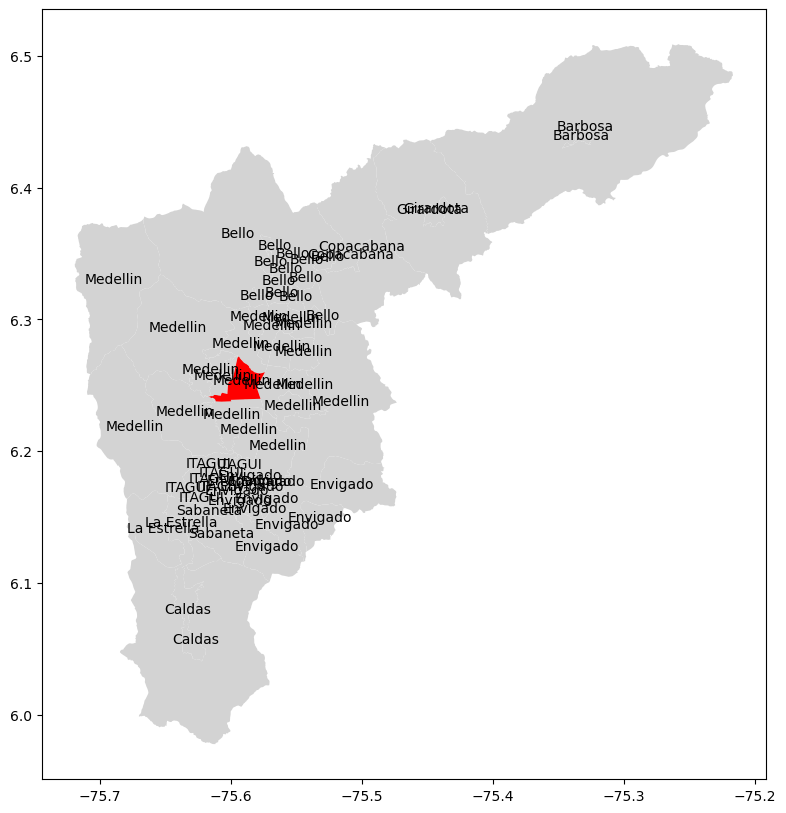

In [91]:
# plot the communa_gdf  and mark the area as red where it's index is 42
fig, ax = plt.subplots(figsize=(10, 10))
communa_gdf.plot(ax=ax, color='lightgrey')
communa_gdf[communa_gdf.index == 42].plot(ax=ax, color='red')
# plot each communa's name based on the 'MUNICIPIO' column
communa_gdf.apply(lambda x: ax.annotate(text=x.MUNICIPIO, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
plt.show()


In [152]:
medellin_boundary = medellin_boundary.to_crs(epsg=4326)
gdf_combined = gdf_combined.to_crs(epsg=4326)
communa_gdf = communa_gdf.to_crs(epsg=4326)

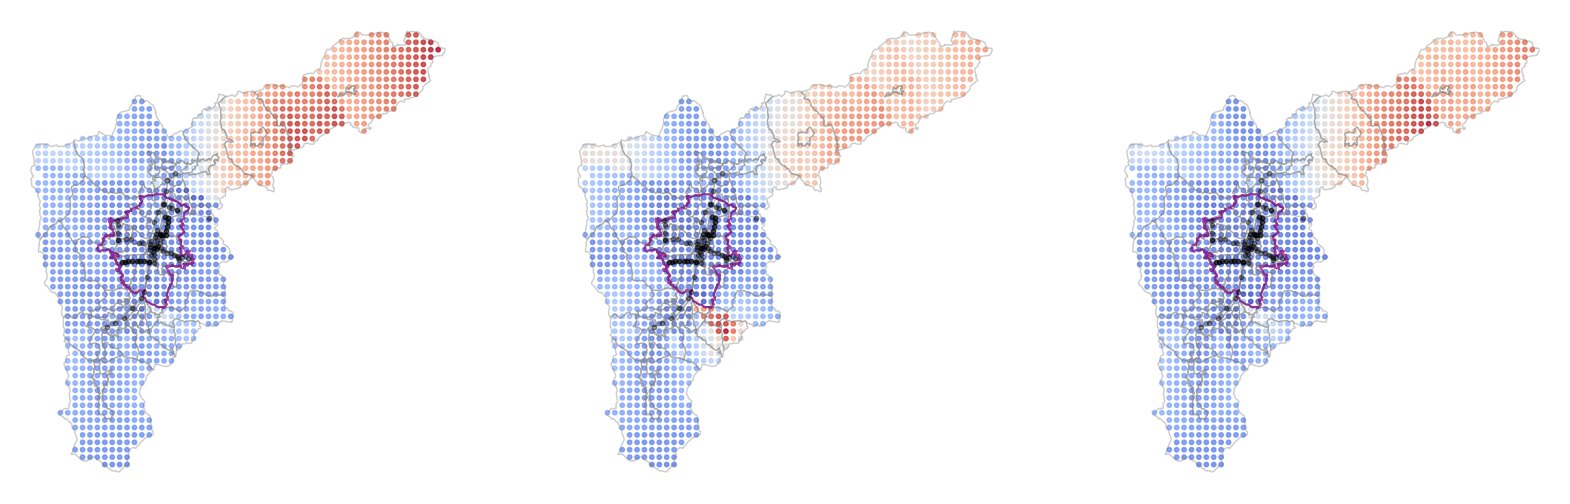

In [160]:
#plot the result_gdf in three subplots, and use the OD_value, poor_value, Firm_value separately as the color of the points, 
# and also  and comuna_gdf on the same map
# also plot the G_metro  in each subplot
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[0], node_size=10, edge_color='grey', width=1, node_color='black', alpha=0.4)
gdf_combined.plot(ax=ax[0], column='OD_value', legend=False, alpha=0.8, cmap='coolwarm', s=10)
communa_gdf.plot(ax=ax[0], edgecolor='grey', facecolor='none', alpha=0.4)
# plot the medellin boundary
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[0])

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[1], node_size=10, edge_color='grey', width=1, node_color='black', alpha=0.4)
gdf_combined.plot(ax=ax[1], column='Firm_value', legend=False, alpha=0.8, cmap='coolwarm', s=10)
communa_gdf.plot(ax=ax[1], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[1])


nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[2], node_size=10, edge_color='grey', width=1, node_color='black', alpha=0.4)
gdf_combined.plot(ax=ax[2], column='Poor_value', legend=False, alpha=0.8, cmap='coolwarm', s=10)
communa_gdf.plot(ax=ax[2], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[2])

fig.savefig('Results/Value.png', dpi=300)
plt.show()

In [564]:
result_gdf.sample(4)

geometry      OD_value   OD_station    Firm_value  \
393  POINT (-75.58463 6.21864)  13595.915103      Poblado   13311.91574   
29   POINT (-75.60259 5.98640)  13620.884425  La Estrella  13350.547978   
294  POINT (-75.69242 6.23650)  13688.007006  La Estrella  13377.913301   
39   POINT (-75.63852 6.02213)  13669.621846  La Estrella   13386.85593   

    Firm_station    Poor_value Poor_station   id            OD_station_coords  \
393      Poblado  13758.440066      Poblado  393  (-75.57803199, 6.212673312)   
29   La Estrella  13821.428218  La Estrella   29   (-75.62650308, 6.15269482)   
294  La Estrella  13845.194662  La Estrella  294   (-75.62650308, 6.15269482)   
39   La Estrella  13869.578653  La Estrella   39   (-75.62650308, 6.15269482)   

             Firm_station_coords          Poor_station_coords OD_distance  \
393  (-75.57803199, 6.212673312)  (-75.57803199, 6.212673312)        None   
29    (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)        None   
294   (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)        None   
39    (-75.62650308, 6.15269482)   (-75.62650308, 6.15269482)        None   

    Firm_distance Poor_distance OD_ratio Firm_ratio Poor_ratio    OD_distanc  \
393          None          None      NaN        NaN        NaN  1.044184e+07   
29           None          None      NaN        NaN        NaN  1.041669e+07   
294          None          None      NaN        NaN        NaN  1.044595e+07   
39           None          None      NaN        NaN        NaN  1.042150e+07   

        Firm_dist    Poor_dista  
393  1.044184e+07  1.044184e+07  
29   1.041669e+07  1.041669e+07  
294  1.044595e+07  1.044595e+07  
39   1.042150e+07  1.042150e+07

In [158]:
gdf_combined.columns

Index(['OD_value', 'OD_station', 'Firm_value', 'Firm_stati', 'Poor_value',
       'Poor_stati', 'id', 'OD_stati_1', 'Firm_sta_1', 'Poor_sta_1',
       'OD_distanc', 'Firm_dista', 'Poor_dista', 'OD_ratio', 'Firm_ratio',
       'Poor_ratio', 'OD_ratio_n', 'Firm_rat_1', 'Poor_rat_1', 'geometry'],
      dtype='object')

NameError: name 'G_metro' is not defined

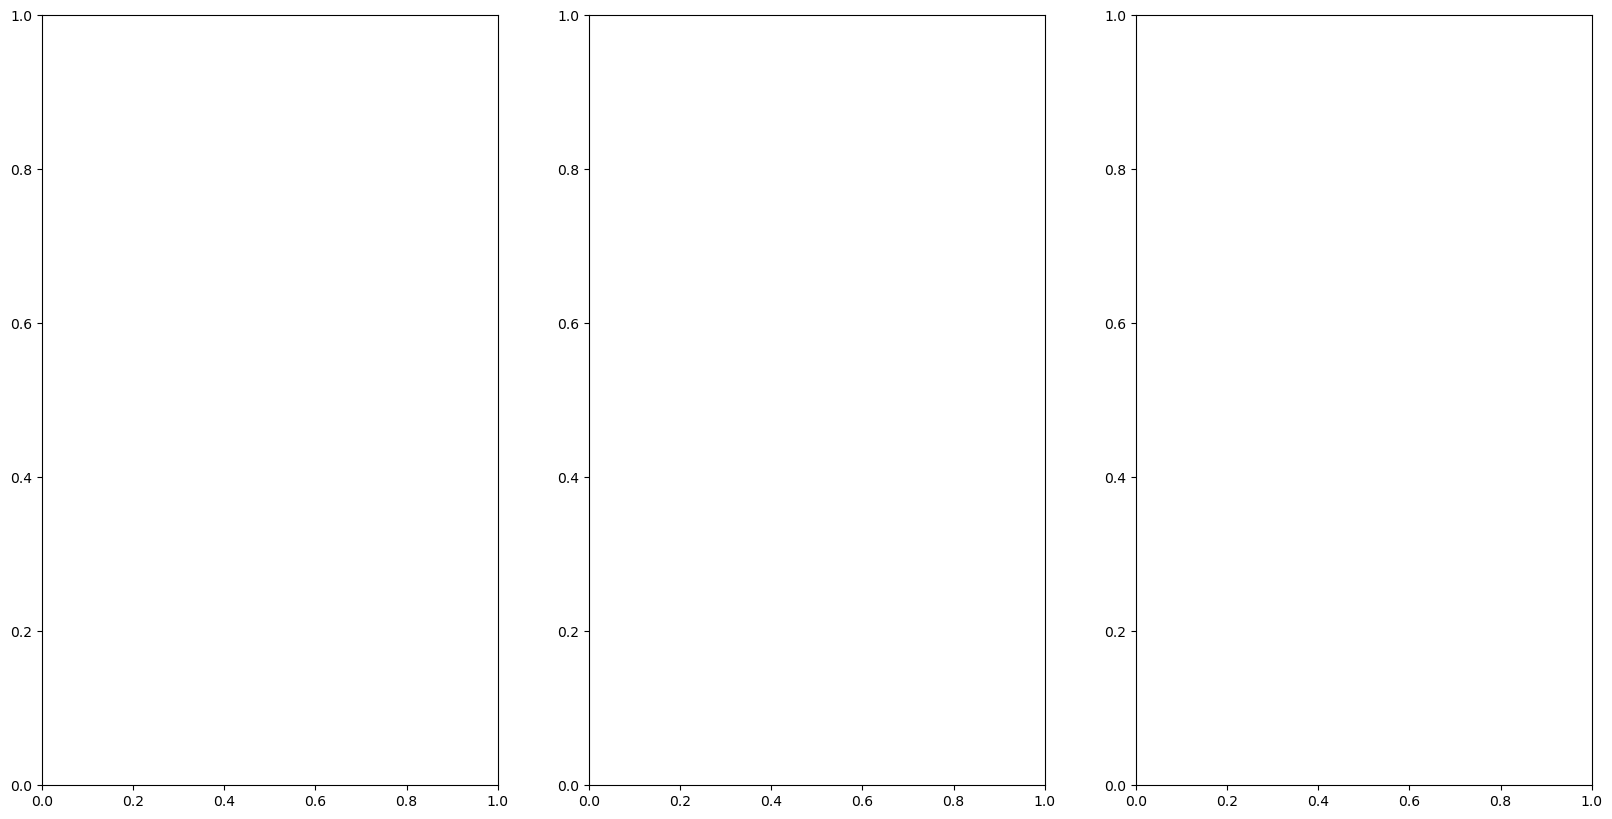

In [33]:
# 确保这些列的值是数值类型
gdf_combined['OD_ratio_n'] = pd.to_numeric(gdf_combined['OD_ratio_n'], errors='coerce')
gdf_combined['Firm_rat_1'] = pd.to_numeric(gdf_combined['Firm_rat_1'], errors='coerce')
gdf_combined['Poor_rat_1'] = pd.to_numeric(gdf_combined['Poor_rat_1'], errors='coerce')

#plot the result_gdf in three subplots, and use the OD_value, poor_value, Firm_value separately as the color of the points, 
# and also  and comuna_gdf on the same map
# also plot the G_metro  in each subplot
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[0], node_size=6, edge_color='grey', width=0.5, node_color='green', alpha=0.3)
gdf_combined.plot(ax=ax[0], column='OD_ratio_n', legend=False, alpha=0.8, cmap='coolwarm', s=10, scheme='JenksCaspallForced', k=15)
communa_gdf.plot(ax=ax[0], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[0])

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[1], node_size=6, edge_color='grey', width=0.5, node_color='green', alpha=0.3)
gdf_combined.plot(ax=ax[1], column='Firm_rat_1', legend=False, alpha=0.8, cmap='coolwarm', s=10, scheme='JenksCaspallForced', k=15)
communa_gdf.plot(ax=ax[1], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[1])


nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[2], node_size=6, edge_color='grey', width=0.5, node_color='green', alpha=0.3)
gdf_combined.plot(ax=ax[2], column='Poor_rat_1', legend=False, alpha=0.8, cmap='coolwarm', s=10, scheme='JenksCaspallForced', k=15)
communa_gdf.plot(ax=ax[2], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[2])

#save the plot as an png
fig.savefig('Results/Ratio.png', dpi=300)

plt.show()



In [68]:
gdf_combined['final'] = gdf_combined['OD_ratio_n'] + gdf_combined['Firm_rat_1'] + gdf_combined['Poor_rat_1']

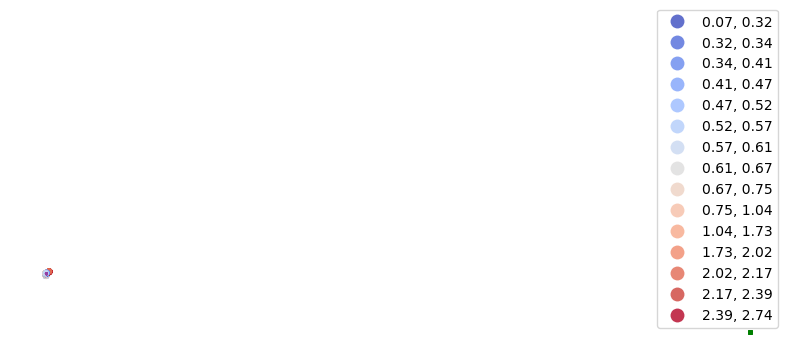

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 绘制G_metro
nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax, node_size=6, edge_color='grey', width=0.5, node_color='green', alpha=0.3)

# 绘制gdf_combined，使用OD_ratio_n列作为颜色
gdf_combined.plot(ax=ax, column='final', legend=True, alpha=0.8, cmap='coolwarm', s=10, scheme='JenksCaspallForced', k=15)

# 绘制communa_gdf
communa_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.4)

# 绘制medellin_boundary
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7, ax=ax)

# 保存图像为png格式
fig.savefig('Results/Final_ratio.png', dpi=300)

plt.show()

In [70]:
# clip all points where in the medellin boundary
# 筛选在boundary范围内的点
within_boundary = gdf_combined[gdf_combined.within(medellin_boundary.unary_union)]

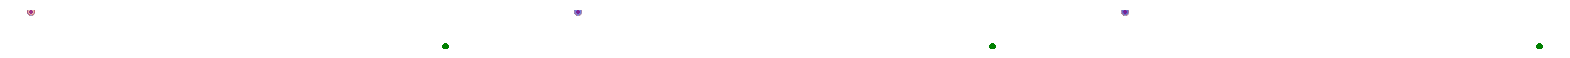

In [71]:
# 确保这些列的值是数值类型
"""
gdf_combined['OD_ratio_n'] = pd.to_numeric(gdf_combined['OD_ratio_n'], errors='coerce')
gdf_combined['Firm_rat_1'] = pd.to_numeric(gdf_combined['Firm_rat_1'], errors='coerce')
gdf_combined['Poor_rat_1'] = pd.to_numeric(gdf_combined['Poor_rat_1'], errors='coerce')
"""

#plot the result_gdf in three subplots, and use the OD_value, poor_value, Firm_value separately as the color of the points, 
# and also  and comuna_gdf on the same map
# also plot the G_metro  in each subplot
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[0], node_size=10, edge_color='grey', width=1, node_color='green', alpha=0.3)
within_boundary.plot(ax=ax[0], column='OD_ratio_n', legend=False, alpha=0.8, cmap='coolwarm', s=15, scheme='JenksCaspallForced', k=15)
#communa_gdf.plot(ax=ax[0], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[0])

nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[1], node_size=10, edge_color='grey', width=1, node_color='green', alpha=0.3)
within_boundary.plot(ax=ax[1], column='Firm_rat_1', legend=False, alpha=0.8, cmap='coolwarm', s=15, scheme='JenksCaspallForced', k=15)
#communa_gdf.plot(ax=ax[1], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[1])


nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax[2], node_size=10, edge_color='grey', width=1, node_color='green', alpha=0.3)
within_boundary.plot(ax=ax[2], column='Poor_rat_1', legend=False, alpha=0.8, cmap='coolwarm', s=15, scheme='JenksCaspallForced', k=15)
#communa_gdf.plot(ax=ax[2], edgecolor='grey', facecolor='none', alpha=0.4)
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7,ax=ax[2])

#save the plot as an png
fig.savefig('Results/Ratio_city.png', dpi=300)

plt.show()

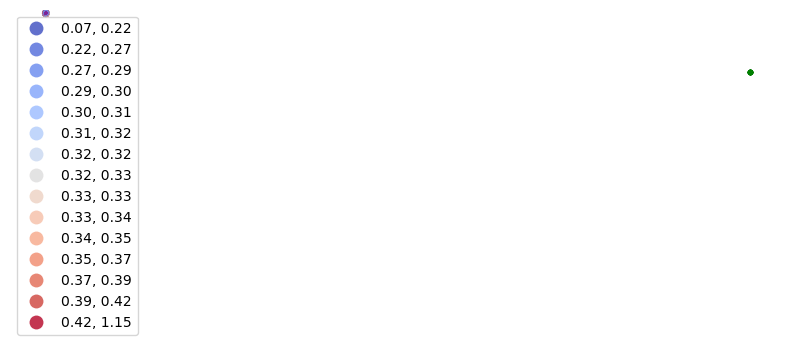

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 绘制G_metro
nx.draw(G_metro, pos=nx.get_node_attributes(G_metro, 'pos'), ax=ax, node_size=8, edge_color='grey', width=1, node_color='green', alpha=0.3)

# 绘制gdf_combined，使用OD_ratio_n列作为颜色
within_boundary.plot(ax=ax, column='final', legend=True, alpha=0.8, cmap='coolwarm', s=15, scheme='JenksCaspallForced', k=15)

# 绘制communa_gdf
#communa_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.4)

# 绘制medellin_boundary
medellin_boundary.plot(facecolor='none', edgecolor='purple', linewidth=1.5, alpha=0.7, ax=ax)

# 保存图像为png格式
fig.savefig('Results/Final_ratio.png', dpi=300)

plt.show()

In [73]:
gdf_combined.columns

Index(['OD_value', 'OD_station', 'Firm_value', 'Firm_stati', 'Poor_value',
       'Poor_stati', 'id', 'OD_stati_1', 'Firm_sta_1', 'Poor_sta_1',
       'OD_distanc', 'Firm_dista', 'Poor_dista', 'OD_ratio', 'Firm_ratio',
       'Poor_ratio', 'OD_ratio_n', 'Firm_rat_1', 'Poor_rat_1', 'geometry',
       'final'],
      dtype='object')

In [80]:
final_df

comuna_index                                           geometry  \
0            1.0  POLYGON ((-8417177.405 689386.889, -8417136.71...   
1            2.0  POLYGON ((-8417182.515 689769.891, -8417172.21...   
2           25.0  POLYGON ((-8421051.224 687698.875, -8421050.66...   
3            6.0  POLYGON ((-8412935.791 709759.791, -8412936.14...   
4            5.0  POLYGON ((-8412283.474 708369.945, -8412296.17...   
..           ...                                                ...   
61          41.0  POLYGON ((-8398837.407 717903.328, -8398834.28...   
62          27.0  POLYGON ((-8397487.834 712928.795, -8397465.02...   
63          47.0  POLYGON ((-8407410.603 701386.983, -8407402.52...   
64          31.0  POLYGON ((-8409973.056 703223.846, -8409968.49...   
65           4.0  POLYGON ((-8419022.211 688764.290, -8418954.41...   

    population  num_firms   stratum      area  destination_trips  \
0        13458        494  1.901746  0.000075               1113   
1        12853        949  2.040128  0.000054                359   
2       175765         73  2.127838  0.000646                496   
3        17486        378  1.793694  0.000161                490   
4        22363       1459  2.206717  0.000139                683   
..         ...        ...       ...       ...                ...   
61       16071       3728  3.022330  0.006322                844   
62       85149        152  2.339601  0.000267               1083   
63      167209       6272  5.325056  0.005797                703   
64       11172        821  2.624020  0.000253               1942   
65       19296        733  1.955026  0.000224                994   

    origin_trips  total_flow   pop_density  firms_density  Num_demand_points  \
0           1113        2226  1.799843e+08   6.606647e+06                  6   
1            358         717  2.389497e+08   1.764283e+07                  3   
2            496         992  2.719110e+08   1.129321e+05                  3   
3            489         979  1.088922e+08   2.353954e+06                  3   
4            684        1367  1.614643e+08   1.053421e+07                  4   
..           ...         ...           ...            ...                ...   
61           848        1692  2.541949e+06   5.896576e+05                  5   
62          1083        2166  3.192075e+08   5.698192e+05                  5   
63           704        1407  2.884202e+07   1.081863e+06                  4   
64          1945        3887  4.411266e+07   3.241720e+06                  8   
65           997        1991  8.598234e+07   3.266224e+06                  5   

    Num_firms_points  Poor_demand_level  
0                  1                  4  
1                  1                  3  
2                  1                  3  
3                  1                  4  
4                  2                  3  
..               ...                ...  
61                 4                  2  
62                 1                  3  
63                 7                  0  
64                 1                  3  
65                 1                  4  

[66 rows x 14 columns]

In [83]:
# 将points_gdf的坐标系转换为与boundary_gdf一致（如果需要）
gdf_combined = gdf_combined.to_crs(final_df.crs)


# 计算每个行政区域内点的'final'列的平均值
def average_values(group):
    return group['final'].mean()

# 使用groupby方法计算每个行政区域内点的'final'列的平均值
final_df['average_final'] = gdf_combined.groupby('id')['final'].mean()

# 打印前10行的行政区域，按'final'列的值降序排列
final_df.sort_values(by='average_final', ascending=False).head(10)


# print the top 10 rows of the medellin_boundary based on the 'final' columns value in descending order
answer = final_df.sort_values(by='average_final', ascending=False).head(10)

# drop the geometry information and convert answer from geodataframe to dataframe
answer = answer.drop(columns='geometry').reset_index()



# save answer as the csv
answer.to_csv('Results/answer.csv')

In [ ]:
#plot the communa_gdf labels with the 'average_final' column values
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 绘制行政区域
communa_gdf.plot(ax=ax, edgecolor='grey', facecolor='none', alpha=0.4)

# 绘制行政区域的标签
for x, y, label in zip(communa_gdf.centroid.x, communa_gdf.centroid.y, communa_gdf['average_final']):
    ax.text(x, y, round(label, 2), fontsize=8, ha='center', va='center')
    